In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
# to split the data set
from sklearn.model_selection import train_test_split
# LabelEncoder module
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Input , Dense , Flatten ,Dropout
from tensorflow.keras.optimizers import  SGD, Adam, Adagrad, Adadelta, Adamax
import datetime
from keras.regularizers import l2

import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt


In [30]:
zipfile.ZipFile("/kaggle/input/leaf-classification/train.csv.zip", 'r').extractall("/kaggle/working")
zipfile.ZipFile("/kaggle/input/leaf-classification/test.csv.zip", 'r').extractall("/kaggle/working")
zipfile.ZipFile("/kaggle/input/leaf-classification/sample_submission.csv.zip", 'r').extractall("/kaggle/working")
zipfile.ZipFile("/kaggle/input/leaf-classification/images.zip", 'r').extractall("/kaggle/working")

In [31]:
df  = pd.read_csv("/kaggle/working/train.csv" , index_col= 0)



In [32]:
df.head()

species   margin1   margin2   margin3   margin4   margin5  \
id                                                                            
1             Acer_Opalus  0.007812  0.023438  0.023438  0.003906  0.011719   
2   Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625  0.025391   
3    Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812  0.003906   
5         Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859  0.021484   
6      Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766  0.013672   

     margin6   margin7  margin8   margin9  ...  texture55  texture56  \
id                                         ...                         
1   0.009766  0.027344      0.0  0.001953  ...   0.007812   0.000000   
2   0.001953  0.019531      0.0  0.000000  ...   0.000977   0.000000   
3   0.005859  0.068359      0.0  0.000000  ...   0.154300   0.000000   
5   0.019531  0.023438      0.0  0.013672  ...   0.000000   0.000977   
6   0.015625  0.005859      0.0  0.000000  ...   0.096680   0.000000   

    texture57  texture58  texture59  texture60  texture61  texture62  \
id                                                                     
1    0.002930   0.002930   0.035156        0.0        0.0   0.004883   
2    0.000000   0.000977   0.023438        0.0        0.0   0.000977   
3    0.005859   0.000977   0.007812        0.0        0.0   0.000000   
5    0.000000   0.000000   0.020508        0.0        0.0   0.017578   
6    0.021484   0.000000   0.000000        0.0        0.0   0.000000   

    texture63  texture64  
id                        
1    0.000000   0.025391  
2    0.039062   0.022461  
3    0.020508   0.002930  
5    0.000000   0.047852  
6    0.000000   0.031250  

[5 rows x 193 columns]

In [33]:
df.describe()

margin1     margin2     margin3     margin4     margin5     margin6  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.017412    0.028539    0.031988    0.023280    0.014264    0.038579   
std      0.019739    0.038855    0.025847    0.028411    0.018390    0.052030   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.001953    0.001953    0.013672    0.005859    0.001953    0.000000   
50%      0.009766    0.011719    0.025391    0.013672    0.007812    0.015625   
75%      0.025391    0.041016    0.044922    0.029297    0.017578    0.056153   
max      0.087891    0.205080    0.156250    0.169920    0.111330    0.310550   

          margin7     margin8     margin9    margin10  ...   texture55  \
count  990.000000  990.000000  990.000000  990.000000  ...  990.000000   
mean     0.019202    0.001083    0.007167    0.018639  ...    0.036501   
std      0.017511    0.002743    0.008933    0.016071  ...    0.063403   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.005859    0.000000    0.001953    0.005859  ...    0.000000   
50%      0.015625    0.000000    0.005859    0.015625  ...    0.004883   
75%      0.029297    0.000000    0.007812    0.027344  ...    0.043701   
max      0.091797    0.031250    0.076172    0.097656  ...    0.429690   

        texture56   texture57   texture58   texture59   texture60   texture61  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.005024    0.015944    0.011586    0.016108    0.014017    0.002688   
std      0.019321    0.023214    0.025040    0.015335    0.060151    0.011415   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000977    0.000000    0.004883    0.000000    0.000000   
50%      0.000000    0.005859    0.000977    0.012695    0.000000    0.000000   
75%      0.000000    0.022217    0.009766    0.021484    0.000000    0.000000   
max      0.202150    0.172850    0.200200    0.106450    0.578130    0.151370   

        texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  
mean     0.020291    0.008989    0.019420  
std      0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000977  
50%      0.003906    0.002930    0.011719  
75%      0.023438    0.012695    0.029297  
max      0.375980    0.086914    0.141600  

[8 rows x 192 columns]

In [34]:
print("Size/Shape of the dataset: ",df.shape)    

Size/Shape of the dataset:  (990, 193)


In [35]:
print("Checking for null values:\n",df.isnull().sum()) 

Checking for null values:
 species      0
margin1      0
margin2      0
margin3      0
margin4      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 193, dtype: int64


In [36]:
print("Duplicated data:", df.duplicated().sum())

Duplicated data: 0


In [37]:
print("Checking Data-type of each column:\n",df.dtypes)

Checking Data-type of each column:
 species       object
margin1      float64
margin2      float64
margin3      float64
margin4      float64
              ...   
texture60    float64
texture61    float64
texture62    float64
texture63    float64
texture64    float64
Length: 193, dtype: object


# Visualize the data

In [38]:
data_corr=df.drop(columns=['species'])

<function matplotlib.pyplot.show(close=None, block=None)>

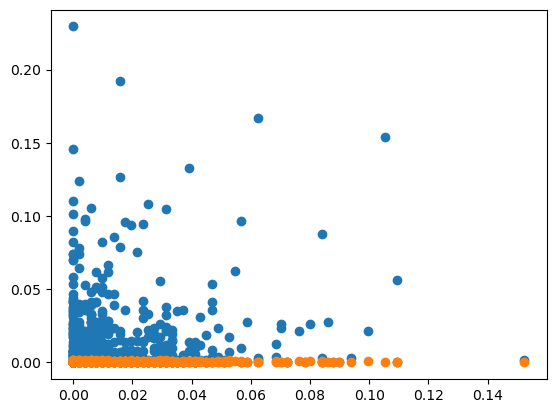

In [39]:
#split columns to three parts(margin,shape,texture) to visualize it and calculate correlation
data_marg=data_corr.iloc[:,:64]
data_texture=data_corr.iloc[:,64:128]
data_shape=data_corr.iloc[:,128:]

plt.scatter(x=data_marg[1:10],y=data_shape[1:10])
plt.scatter(x=data_marg[1:10],y=data_texture[1:10])
plt.show

In [40]:
corr = df.corr()
corr.style.background_gradient(cmap="Spectral")

# Draw some of the images 

In [41]:
images = []
files = glob.glob ("images/*.jpg")
for myFile in files:
    image = cv2.imread(myFile, cv2.IMREAD_GRAYSCALE)
    images.append(image)

print('X_data shape:', np.array(images).shape)

X_data shape: (1584,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


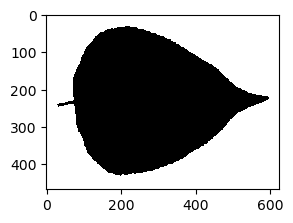

In [42]:
plt.figure(figsize=(3,3))
plt.imshow(images[10],cmap=plt.cm.gray_r, interpolation='nearest')



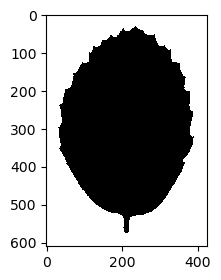

In [43]:
plt.figure(figsize=(3,3))
plt.imshow(images[2],cmap=plt.cm.gray_r, interpolation='nearest')

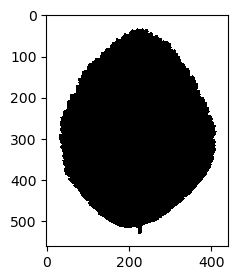

In [44]:
plt.figure(figsize=(3,3))
plt.imshow(images[55],cmap=plt.cm.gray_r, interpolation='nearest')

#  divide the data into a training and test set using approximately 80% for training

In [45]:
y = df.species.values


In [46]:
from numpy import argmax
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

In [47]:
list_of_column_names = list(df.columns)
list_of_column_names.pop(0)

'species'

In [48]:
X = df[list_of_column_names].values
df = pd.DataFrame(X)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, integer_encoded, test_size = 0.2, random_state = 1)

# check shapes
print(X_train.shape)
print(X_val.shape)

(792, 192)
(198, 192)


# 3. computing the mean and standard deviation
> It is clear that the data is already normalized ,We could see that in DF.describe()

> 

In [50]:
'''
from sklearn import preprocessing 
# gets mean and std deviation
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

print(scaler.mean_)
'''

'\nfrom sklearn import preprocessing \n# gets mean and std deviation\nscaler = preprocessing.StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_val = scaler.transform(X_val)\n\nprint(scaler.mean_)\n'

# Encode the labels

In [51]:
encodedyTrain = to_categorical(y_train)
print(encodedyTrain)
# invert encoding
inverted = argmax(encodedyTrain[8])
print("\n", inverted)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 7


# Part II: Training a neural network

In [52]:
#input_features = X.shape[1]
#input_features

In [53]:

from tensorflow.keras.optimizers import Adam
def fun_model(optim = Adam() , bat_size = 32,  hid_nodes = 512, drop_rate = 0.5):
 
  model = Sequential()
  model.add(Dense(hid_nodes, activation='tanh', input_shape=(192,), kernel_initializer = 'glorot_uniform', bias_initializer='zeros', name = 'Layer_1'))
  model.add(Dropout(drop_rate))
  model.add(Dense(99 , activation='softmax', name = 'Output'))

  model.compile(optimizer = optim ,loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
    
  history = model.fit(X_train , y_train , epochs=100 , batch_size=bat_size , validation_data=(X_val, y_val))
 

  return model, history 

In [54]:
def acc_(model_name, history):
    model_history = pd.DataFrame(history.history)
    model_history['epoch'] = history.epoch
    fig, ax = plt.subplots(figsize=(14,8))
    num_epochs = model_history.shape[0]
    ax.plot(np.arange(0, num_epochs), model_history["accuracy"], label="Training accuracy", lw=3, color='#f4b400')
    ax.plot(np.arange(0, num_epochs), model_history["val_accuracy"], label="Validation accuracy", lw=3, color='#0f9d58')
    ax.legend()
    plt.tight_layout()
    plt.show()

In [55]:
def loss_(model_name, history):
    model_history = pd.DataFrame(history.history)
    model_history['epoch'] = history.epoch
    fig, ax = plt.subplots(figsize=(14,8))
    num_epochs = model_history.shape[0]
    ax.plot(np.arange(0, num_epochs), model_history["loss"], label="Training loss", lw=3, color='#f4b400')
    ax.plot(np.arange(0, num_epochs), model_history["val_loss"], label="Validation loss", lw=3, color='#0f9d58')
    ax.legend()
    plt.tight_layout()
    plt.show()

# trial_1  adam optimizer
# We had used adam optimizer in our first model with 32 batch size and 0.5 drop out ratio

In [56]:


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
adam = Adam(learning_rate = lr_schedule)
model_1, history_1 = fun_model(adam , 32)
model_1.summary()
model_1.evaluate(X_val, y_val)

Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 4.5694 - accuracy: 0.0379 - val_loss: 4.5316 - val_accuracy: 0.1364
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 4.4680 - accuracy: 0.2866 - val_loss: 4.4517 - val_accuracy: 0.2525
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 4.3453 - accuracy: 0.4091 - val_loss: 4.3355 - val_accuracy: 0.3434
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 4.1745 - accuracy: 0.4912 - val_loss: 4.1707 - val_accuracy: 0.3788
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 3.9480 - accuracy: 0.5366 - val_loss: 3.9504 - val_accuracy: 0.3788
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 3.6750 - accuracy: 0.5518 - val_loss: 3.6986 - val_accuracy: 0.4141
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 3.3869 - accuracy: 0.5543 - val_loss: 3.4355 - val_accuracy: 0.4293
Epoch 8/100


[0.19591964781284332, 0.9595959782600403]

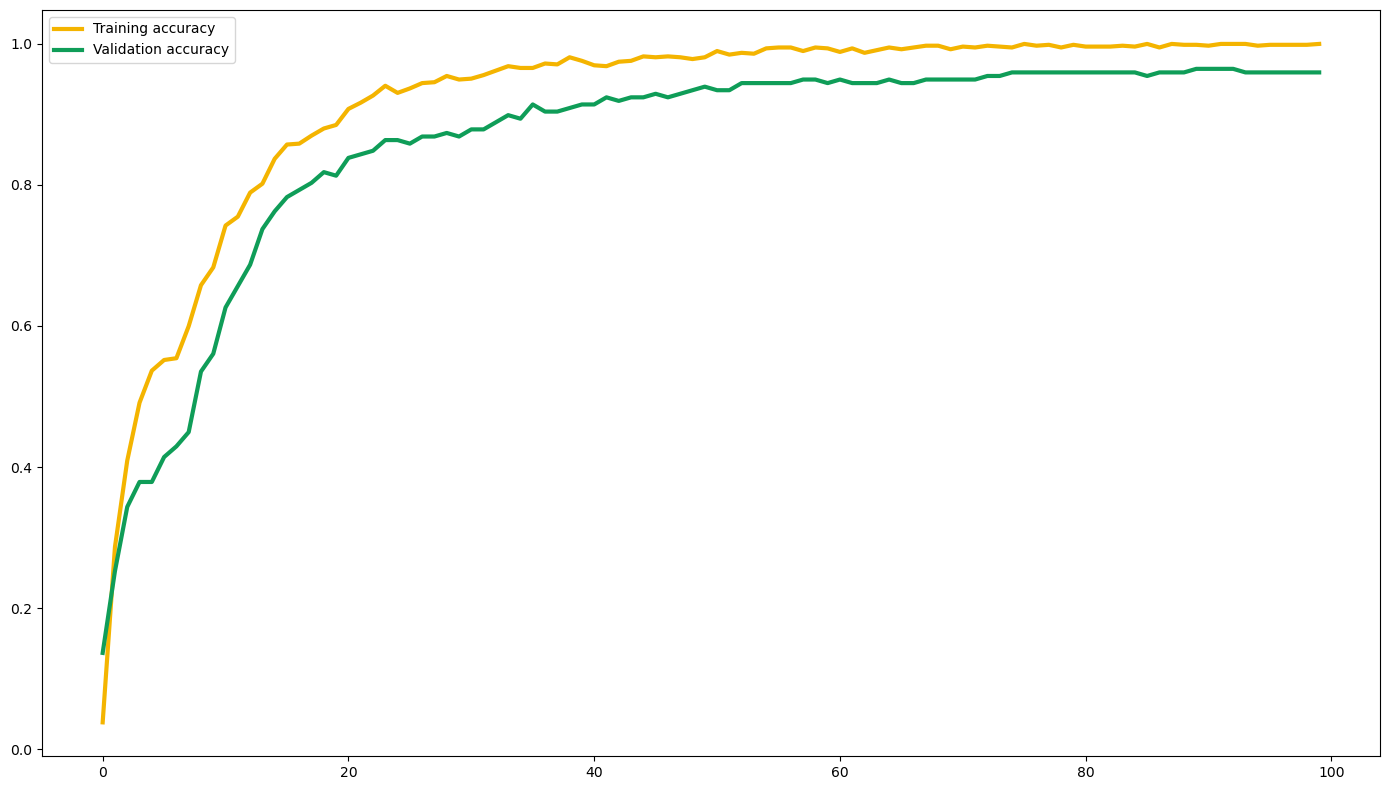

In [57]:
acc_(model_1,history_1)

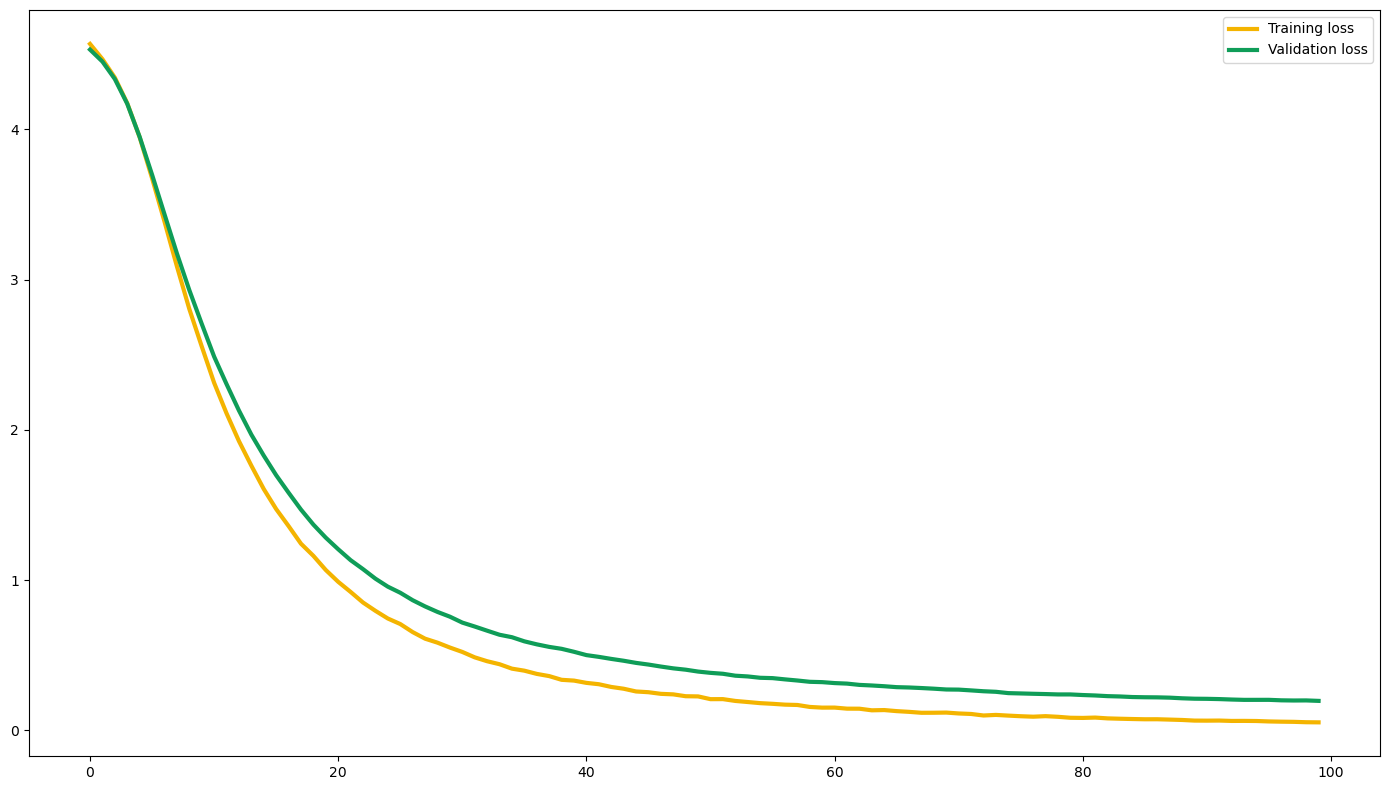

In [58]:
loss_(model_1,history_1)

# trial_2  adam optimizer
# We had used adam optimizer in our first model with 16 batch size and 0.3 drop out ratio

In [59]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
adam = Adam(learning_rate = lr_schedule)
model_2, history_2 = fun_model(adam , 16 , 512 , 0.3)
model_2.summary()
model_2.evaluate(X_val, y_val)

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 4.5440 - accuracy: 0.0934 - val_loss: 4.4712 - val_accuracy: 0.2475
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 4.3343 - accuracy: 0.4217 - val_loss: 4.2596 - val_accuracy: 0.3636
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 4.0067 - accuracy: 0.5025 - val_loss: 3.9073 - val_accuracy: 0.3636
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 3.5453 - accuracy: 0.5631 - val_loss: 3.4632 - val_accuracy: 0.4899
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 3.0502 - accuracy: 0.6010 - val_loss: 3.0348 - val_accuracy: 0.4596
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 2.5958 - accuracy: 0.6717 - val_loss: 2.6580 - val_accuracy: 0.5606
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 2.2219 - accuracy: 0.7134 - val_loss: 2.3189 - val_accuracy: 0.6566
Epoch 8/100
5

[0.13723476231098175, 0.9747474789619446]

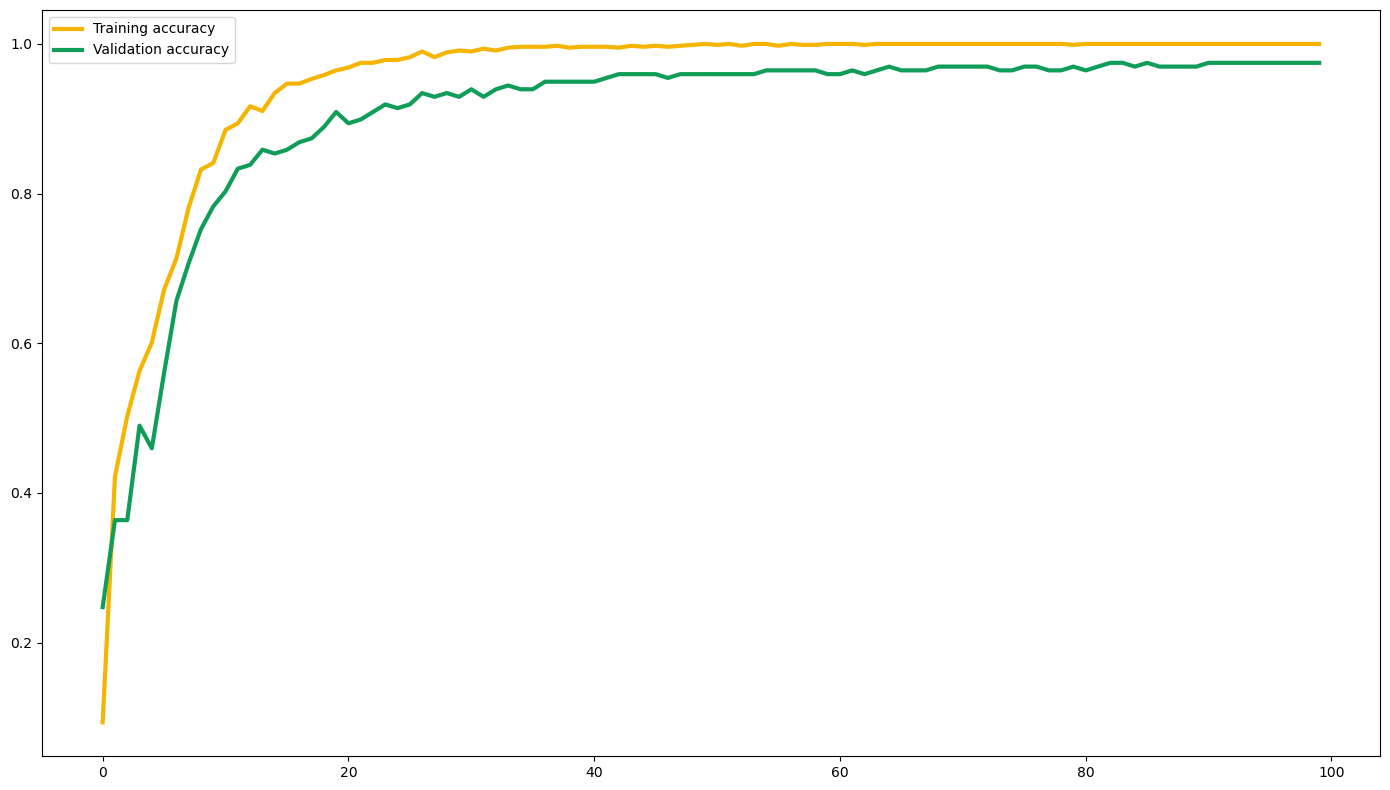

In [60]:
acc_(model_2,history_2)

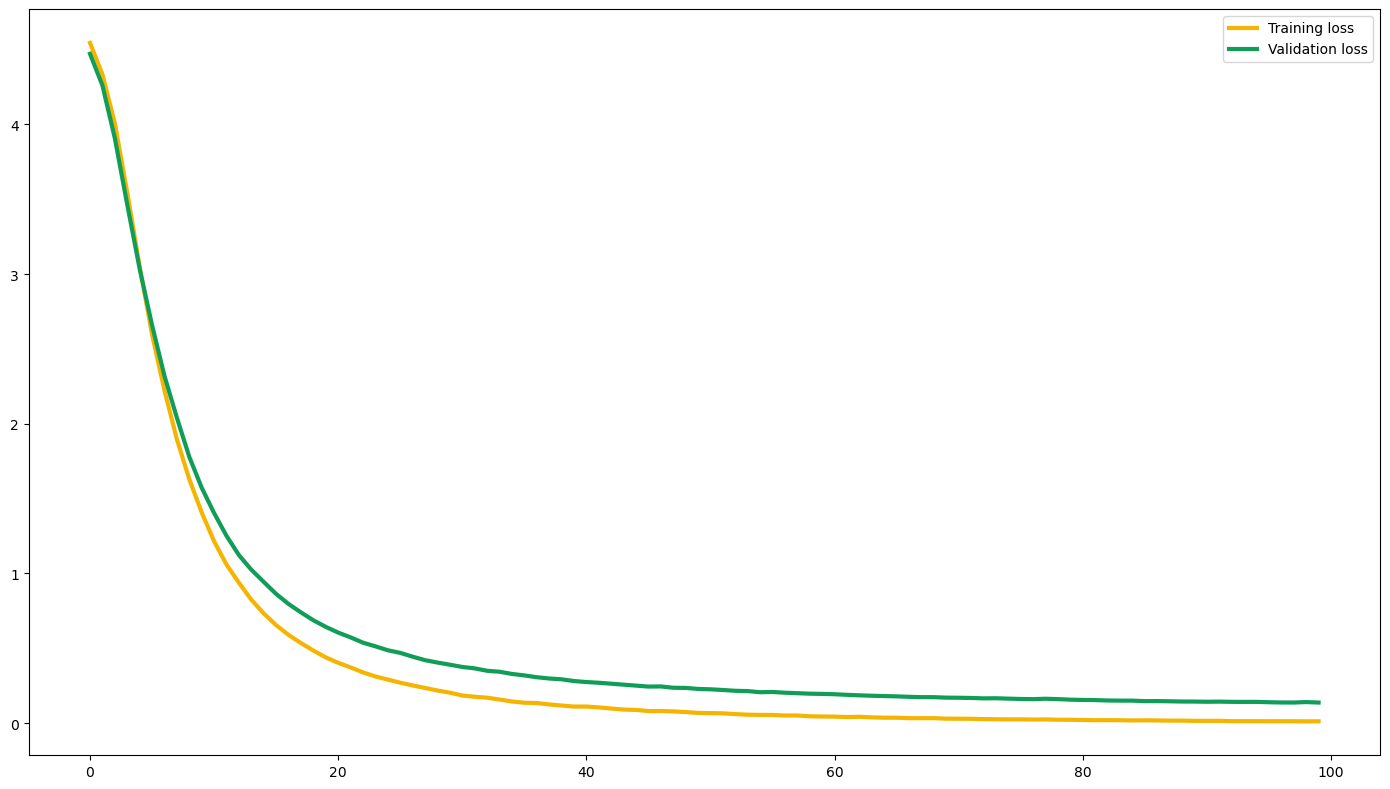

In [61]:
loss_(model_2,history_2)

# trial_3  adam optimizer
# We had used adam optimizer in our first model with 64 batch size , 1024 hidden nodes  and 0.2 drop out ratio

In [62]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
adam = Adam(learning_rate = lr_schedule)
model_3, history_3 = fun_model(adam , 64 , 1024 , 0.2)
model_3.summary()
model_3.evaluate(X_val, y_val)

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 4.5649 - accuracy: 0.0833 - val_loss: 4.5179 - val_accuracy: 0.2020
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 4.4399 - accuracy: 0.3965 - val_loss: 4.4227 - val_accuracy: 0.2929
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 4.2955 - accuracy: 0.4912 - val_loss: 4.2894 - val_accuracy: 0.3283
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 4.1013 - accuracy: 0.5265 - val_loss: 4.0996 - val_accuracy: 0.3788
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 3.8507 - accuracy: 0.5821 - val_loss: 3.8596 - val_accuracy: 0.4040
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 3.5511 - accuracy: 0.5997 - val_loss: 3.5864 - val_accuracy: 0.4293
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 3.2290 - accuracy: 0.6301 - val_loss: 3.2916 - val_accuracy: 0.4596
Epoch 8/10

[0.1876049041748047, 0.9595959782600403]

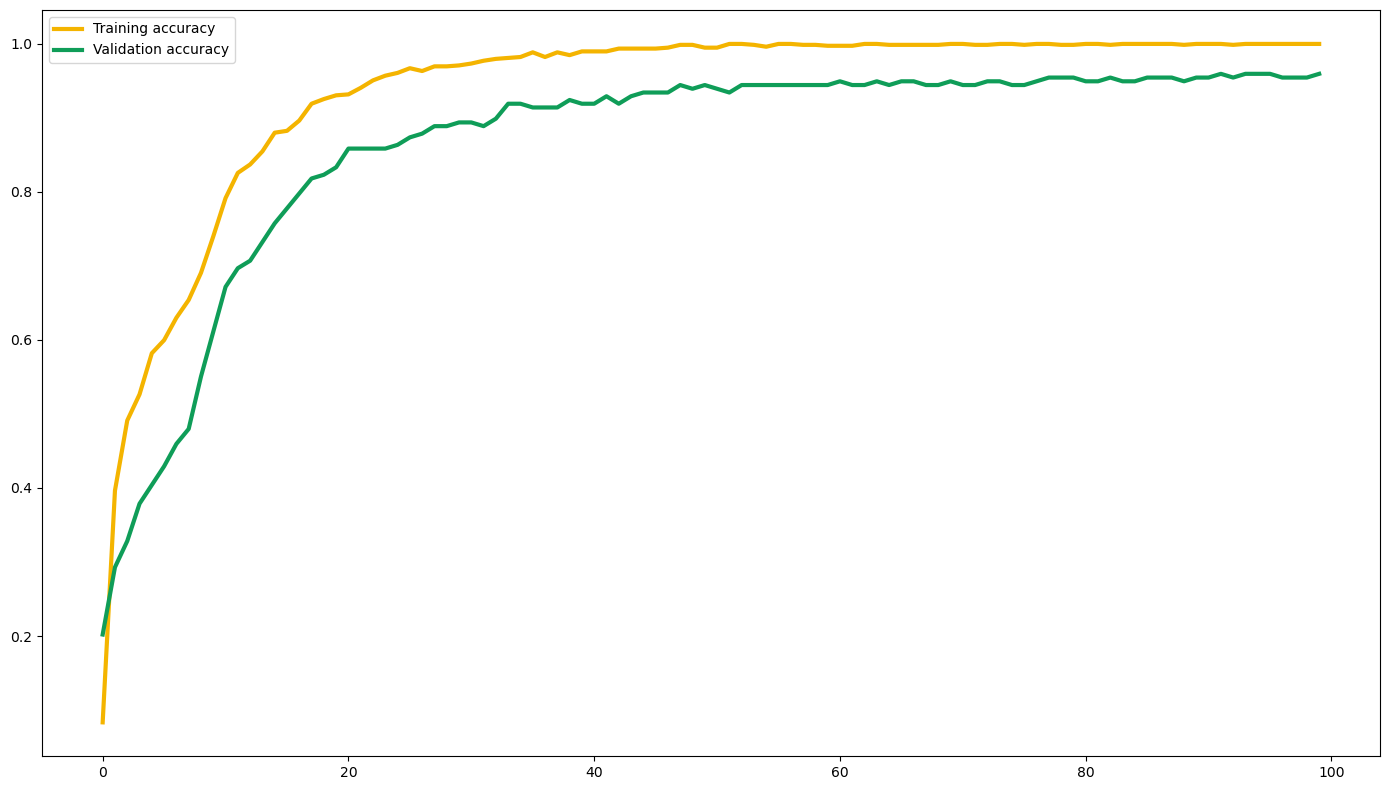

In [63]:
acc_(model_3,history_3)

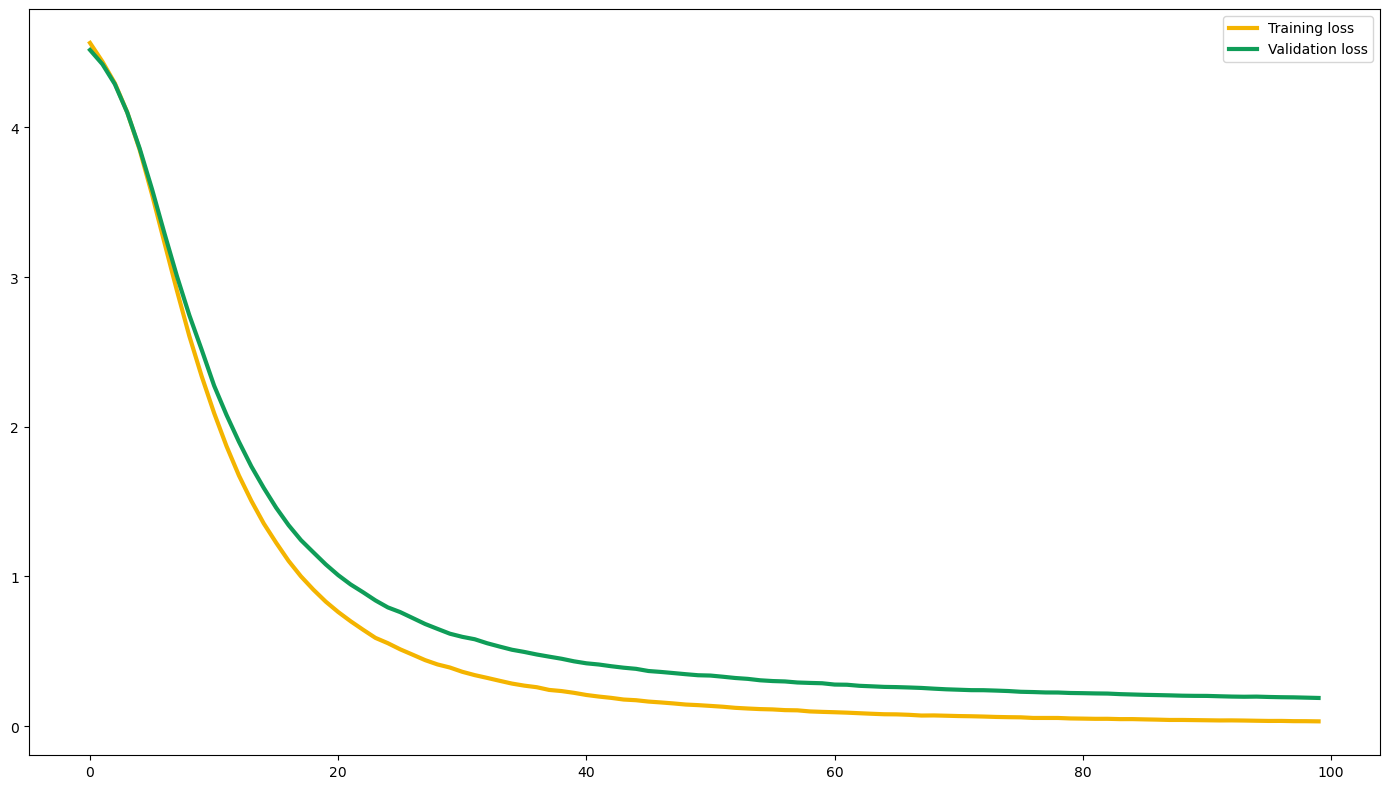

In [64]:
loss_(model_3,history_3)

# trial_4 adam optimizer
# We had used adam optimizer in our first model with 32 batch size , 256 hidden nodes and 0.6 drop out ratio

In [65]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
adam = Adam(learning_rate = lr_schedule)
model_4, history_4 = fun_model(adam , 32 , 256 , 0.6)
model_4.summary()
model_4.evaluate(X_val, y_val)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 4.5875 - accuracy: 0.0202 - val_loss: 4.5643 - val_accuracy: 0.0808
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 4.5277 - accuracy: 0.1035 - val_loss: 4.5247 - val_accuracy: 0.1212
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 4.4707 - accuracy: 0.1641 - val_loss: 4.4734 - val_accuracy: 0.1768
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 4.3956 - accuracy: 0.2854 - val_loss: 4.4046 - val_accuracy: 0.2374
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 4.2955 - accuracy: 0.3611 - val_loss: 4.3146 - val_accuracy: 0.2626
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 4.1807 - accuracy: 0.4015 - val_loss: 4.2046 - val_accuracy: 0.2727
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 4.0256 - accuracy: 0.4318 - val_loss: 4.0628 - val_accuracy: 0.2980
Epoch 8/100
2

[0.30935409665107727, 0.9343434572219849]

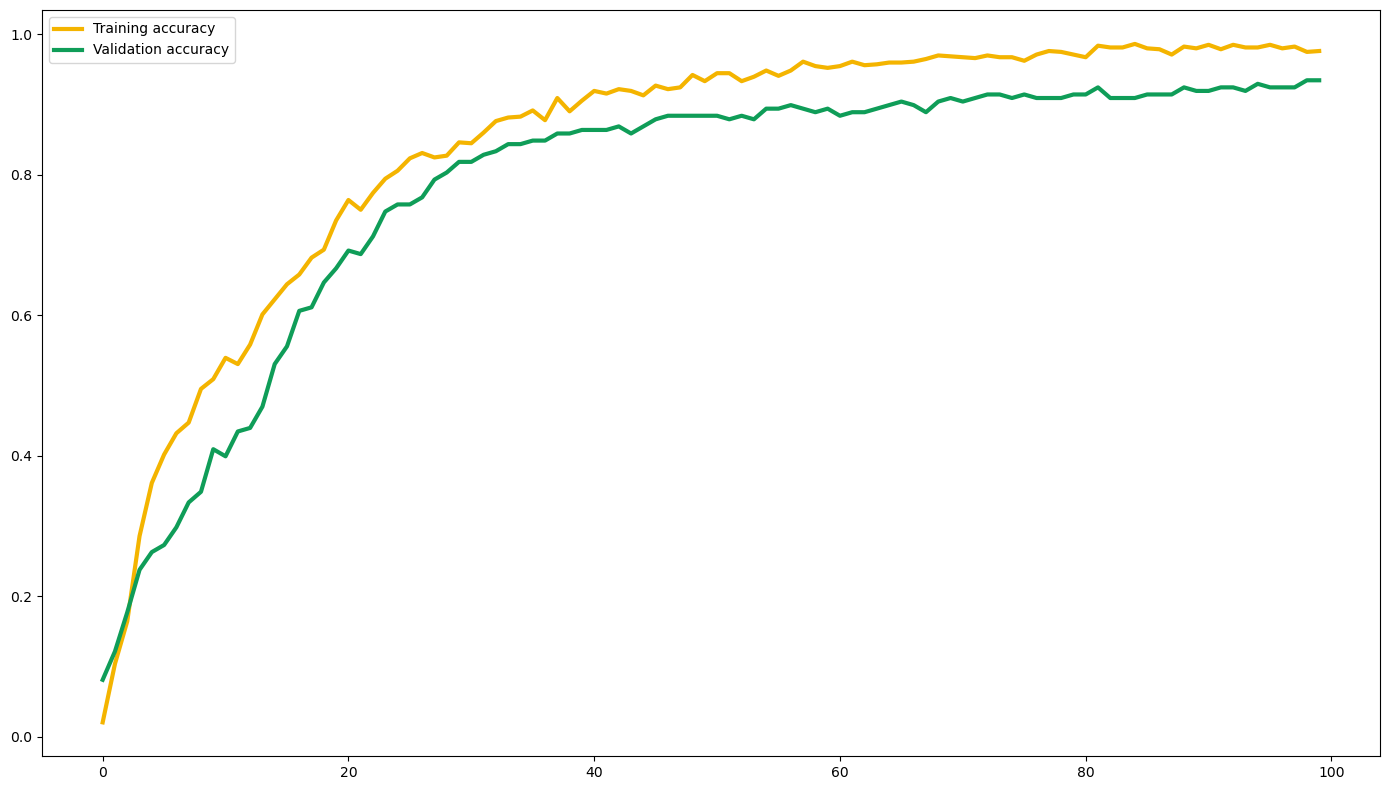

In [66]:
acc_(model_4,history_4)

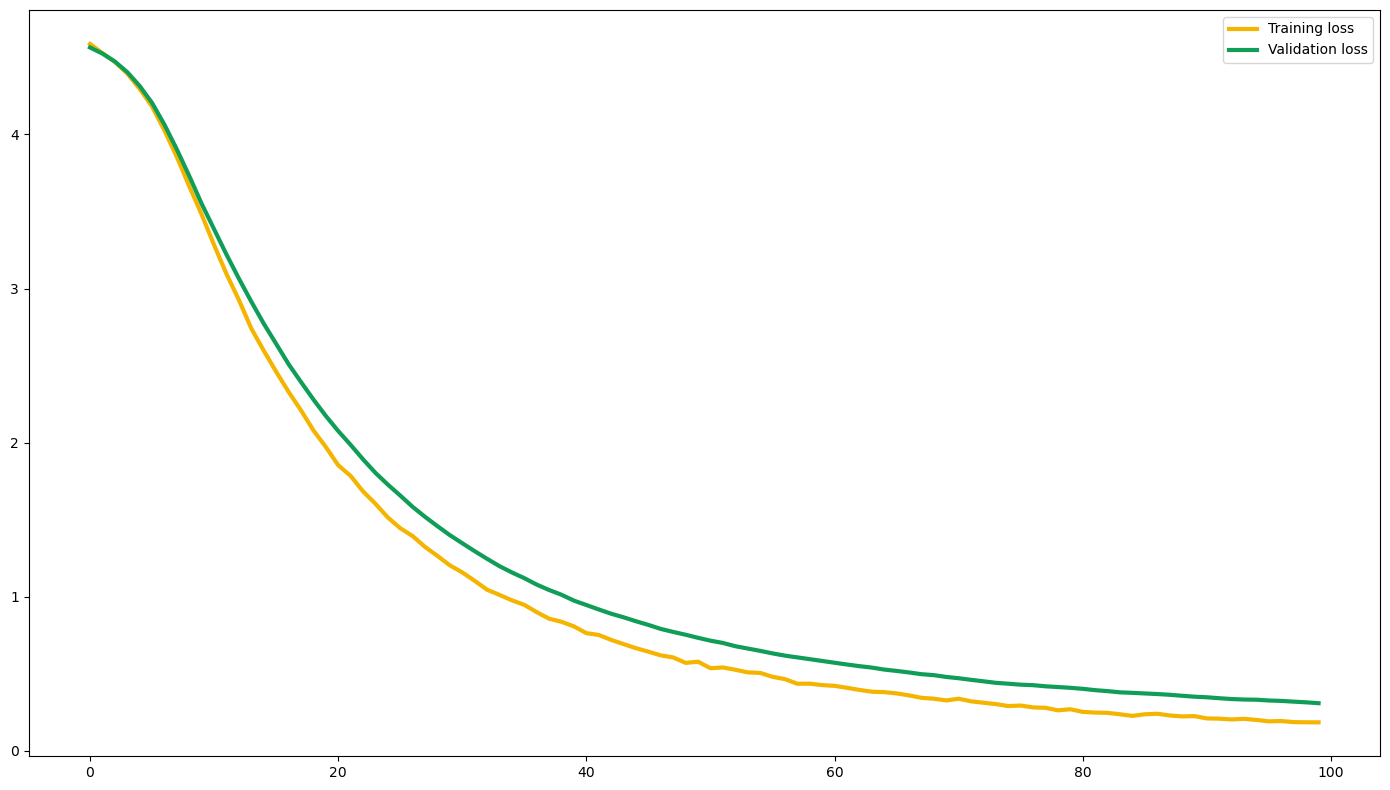

In [67]:
loss_(model_4,history_4)

# trial_5 adam optimizer
# We had used adam optimizer in our first model with 32 batch size , 128 hidden nodes and 0.4 drop out ratio

In [68]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)
adam = Adam(learning_rate = lr_schedule)
model_5, history_5 = fun_model(adam , 32 , 128 , 0.4)
model_5.summary()
model_5.evaluate(X_val, y_val)

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 4.5851 - accuracy: 0.0316 - val_loss: 4.5716 - val_accuracy: 0.0303
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 4.5430 - accuracy: 0.1061 - val_loss: 4.5415 - val_accuracy: 0.1212
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 4.4963 - accuracy: 0.2121 - val_loss: 4.5018 - val_accuracy: 0.1869
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 4.4366 - accuracy: 0.2955 - val_loss: 4.4506 - val_accuracy: 0.2273
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 4.3670 - accuracy: 0.3245 - val_loss: 4.3822 - val_accuracy: 0.2525
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 4.2731 - accuracy: 0.3561 - val_loss: 4.2930 - val_accuracy: 0.2778
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 4.1619 - accuracy: 0.3952 - val_loss: 4.1855 - val_accuracy: 0.3030
Epoch 8/100
2

[0.3892931342124939, 0.9292929172515869]

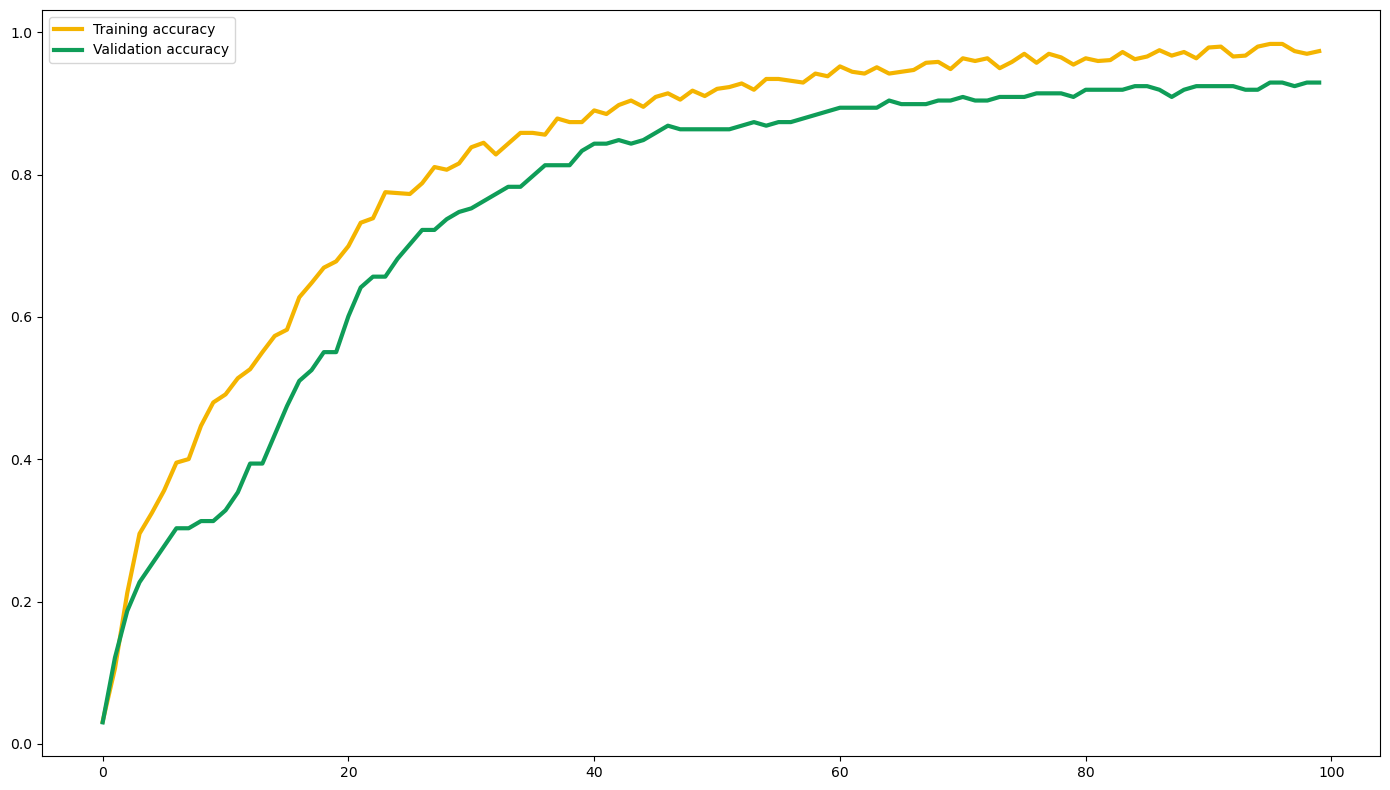

In [69]:
acc_(model_5,history_5)

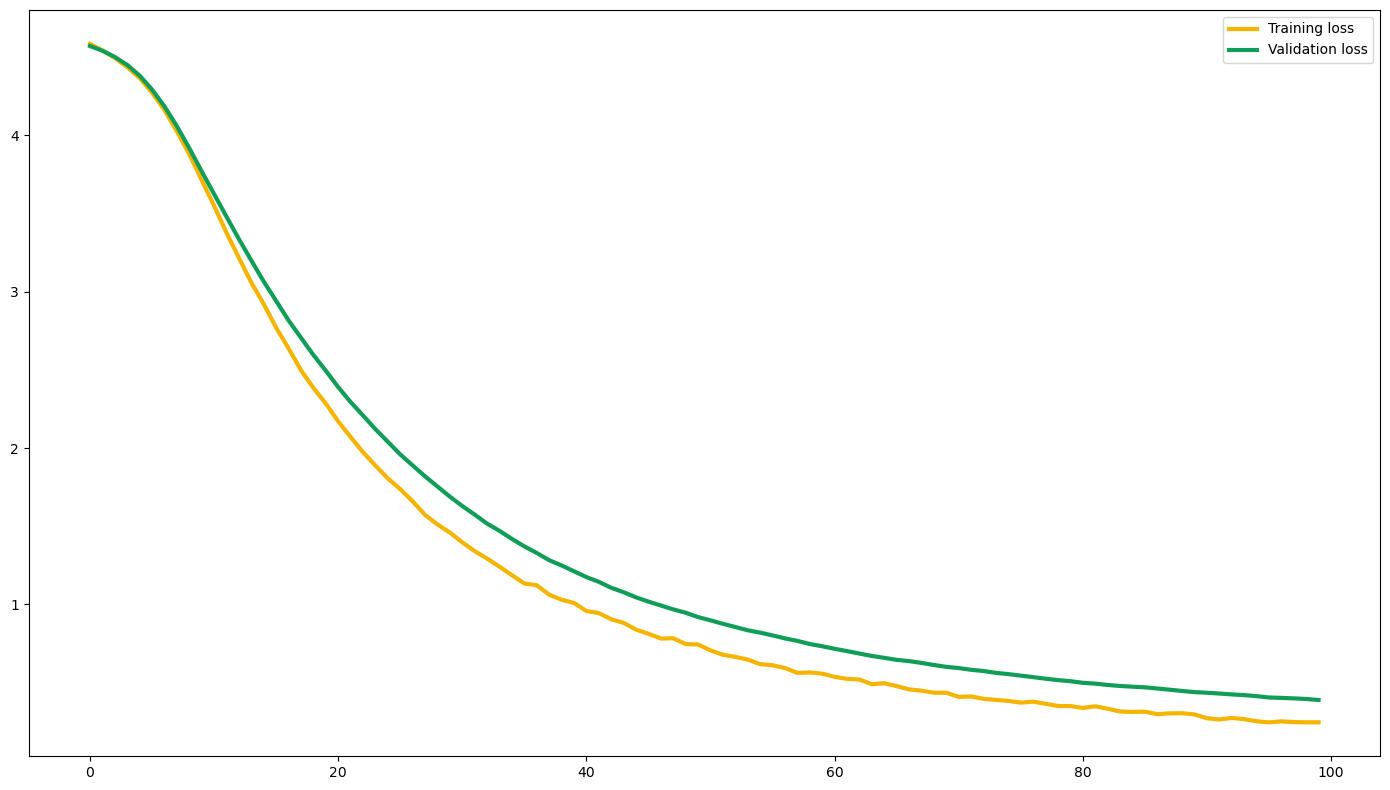

In [70]:
loss_(model_5,history_5)

# trial_1 RMSProp optimizer
# Our second model with RMSProp optimizer with 32 batch size and 0.5 drop out ratio.

In [71]:

rms_prop = tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False, name="RMSprop")

model_6,history_6 = fun_model(rms_prop , 32 , 512 , 0.5)

model_6.summary()

model_6.evaluate(X_val, y_val)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 4.2590 - accuracy: 0.0985 - val_loss: 3.6107 - val_accuracy: 0.2424
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 2.8857 - accuracy: 0.3636 - val_loss: 2.4751 - val_accuracy: 0.4646
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 1.8547 - accuracy: 0.5922 - val_loss: 1.7098 - val_accuracy: 0.5707
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 1.2333 - accuracy: 0.7210 - val_loss: 1.1968 - val_accuracy: 0.7020
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.8687 - accuracy: 0.8093 - val_loss: 0.8820 - val_accuracy: 0.7879
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6139 - accuracy: 0.8725 - val_loss: 0.6693 - val_accuracy: 0.8687
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4425 - accuracy: 0.9192 - val_loss: 0.5566 - val_accuracy: 0.8737
Epoch 8/100


[0.12996125221252441, 0.9797979593276978]

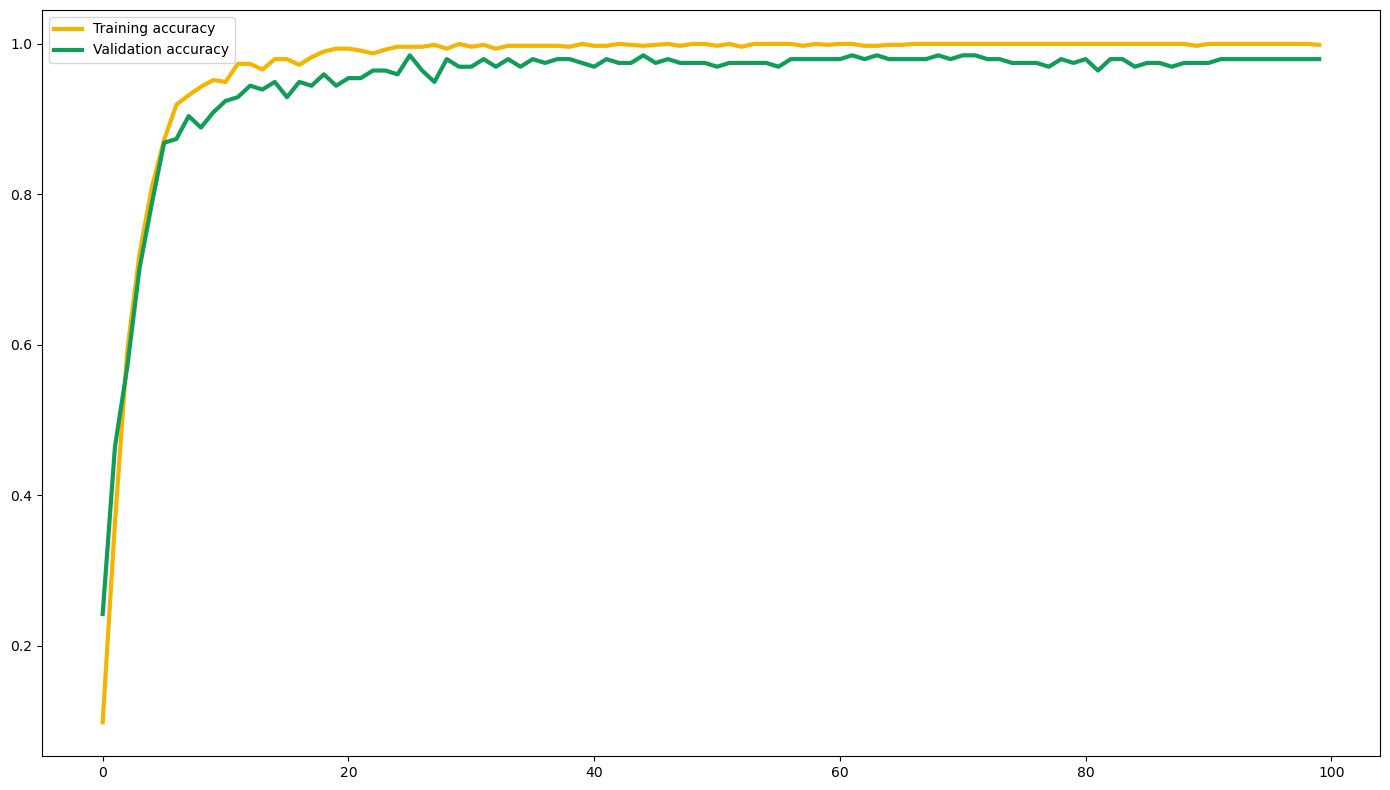

In [72]:
acc_(model_6,history_6)

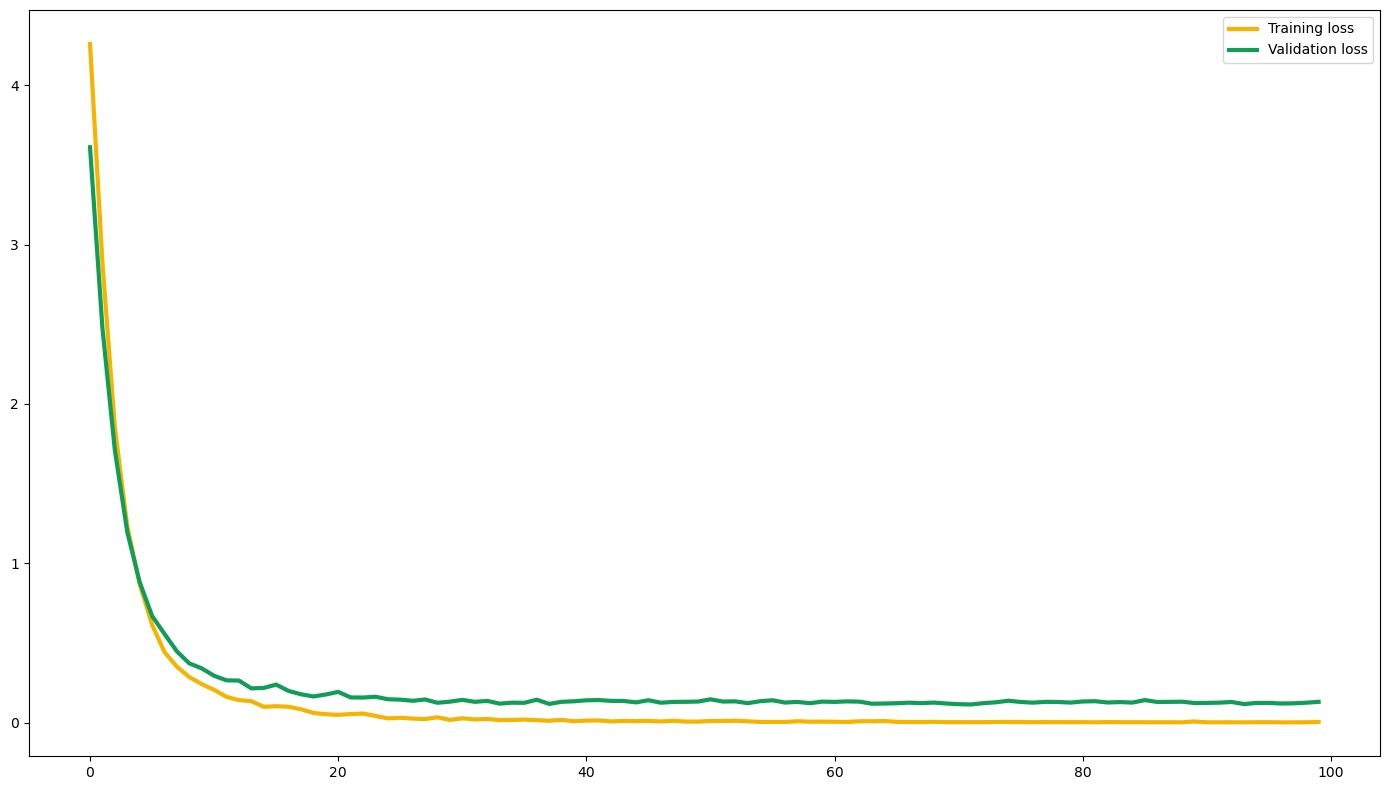

In [73]:
loss_(model_6,history_6)

# trial_2 RMSProp optimizer
# Our second model with RMSProp optimizer with 16 batch size and 0.3 drop out ratio.

In [74]:
rms_prop = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False, name="RMSprop")

model_7,history_7 = fun_model(rms_prop , 16 , 512 , 0.3)

model_7.summary()

model_7.evaluate(X_val, y_val)

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 4.5508 - accuracy: 0.0947 - val_loss: 4.5009 - val_accuracy: 0.2121
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 4.4056 - accuracy: 0.2992 - val_loss: 4.3745 - val_accuracy: 0.2576
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 4.2088 - accuracy: 0.3801 - val_loss: 4.1869 - val_accuracy: 0.3081
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 3.9473 - accuracy: 0.4836 - val_loss: 3.9585 - val_accuracy: 0.3232
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 3.6535 - accuracy: 0.5139 - val_loss: 3.7021 - val_accuracy: 0.3434
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 3.3476 - accuracy: 0.5253 - val_loss: 3.4456 - val_accuracy: 0.3788
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 3.0640 - accuracy: 0.5871 - val_loss: 3.2024 - val_accuracy: 0.4242
Epoch 8/100
5

[0.17860984802246094, 0.9545454382896423]

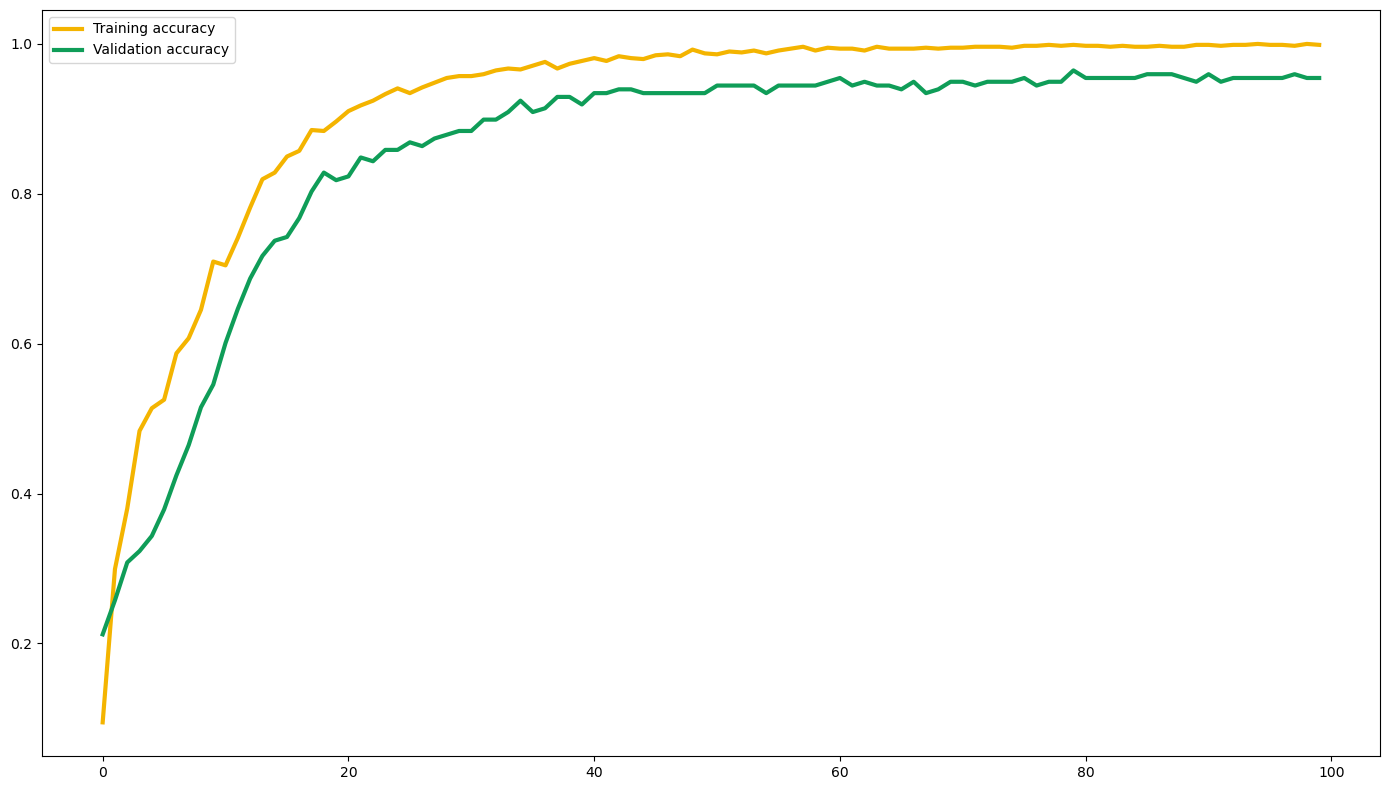

In [75]:
acc_(model_7,history_7)

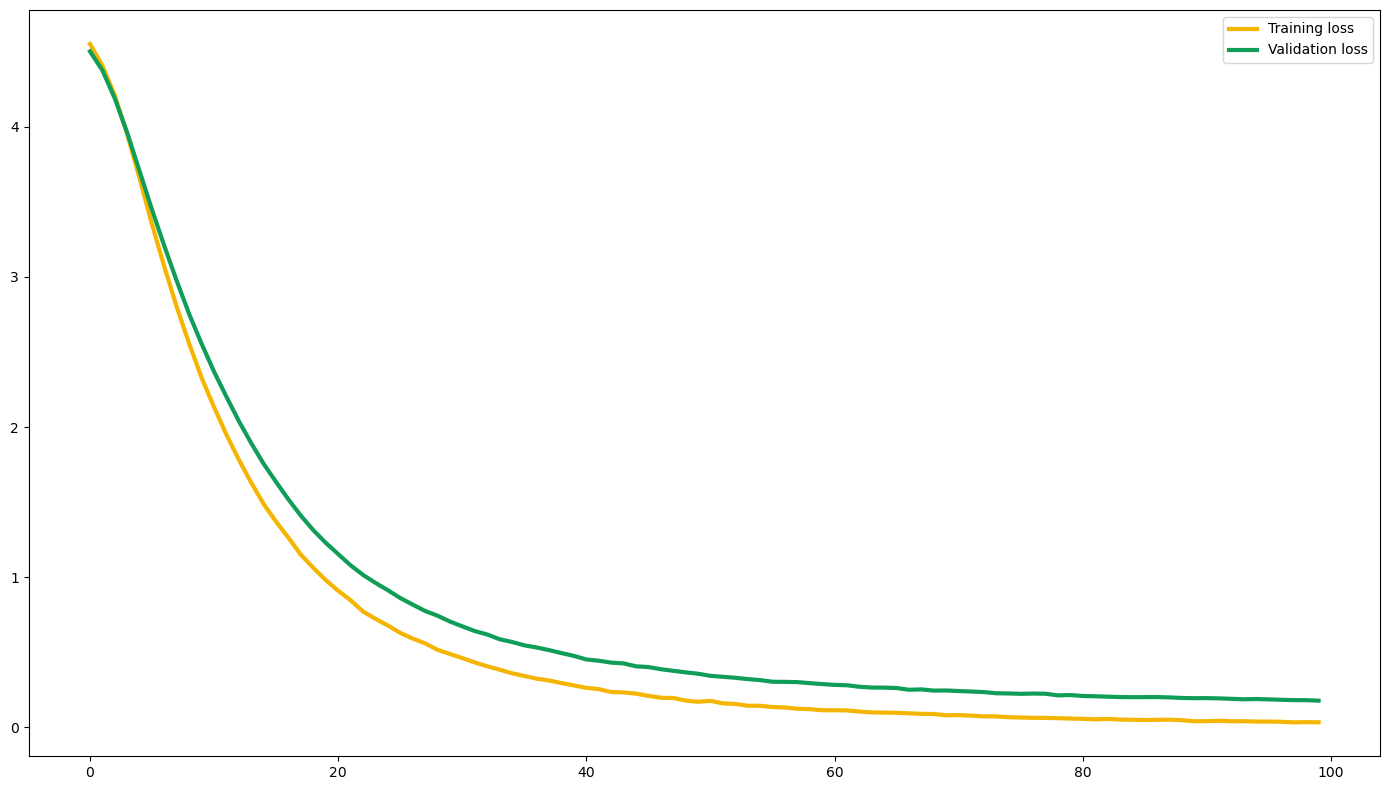

In [76]:
loss_(model_7,history_7)

# trial_3 RMSProp optimizer
# Our second model with RMSProp optimizer with 64 batch size 1024 hidden nodes and 0.2 drop out ratio.

In [77]:
rms_prop = tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False, name="RMSprop")

model_8,history_8 = fun_model(rms_prop , 46 , 1024 , 0.2)

model_8.summary()

model_8.evaluate(X_val, y_val)

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 4.1210 - accuracy: 0.1048 - val_loss: 3.3418 - val_accuracy: 0.1667
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 2.4156 - accuracy: 0.4053 - val_loss: 1.9844 - val_accuracy: 0.5202
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 1.3443 - accuracy: 0.6856 - val_loss: 1.4684 - val_accuracy: 0.4949
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 0.8115 - accuracy: 0.8068 - val_loss: 0.8907 - val_accuracy: 0.7828
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 0.5282 - accuracy: 0.9015 - val_loss: 0.7920 - val_accuracy: 0.7626
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 0.3772 - accuracy: 0.9116 - val_loss: 0.5467 - val_accuracy: 0.8535
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 0.2623 - accuracy: 0.9432 - val_loss: 0.3999 - val_accuracy: 0.8990
Epoch 8/100


[0.1400158852338791, 0.9646464586257935]

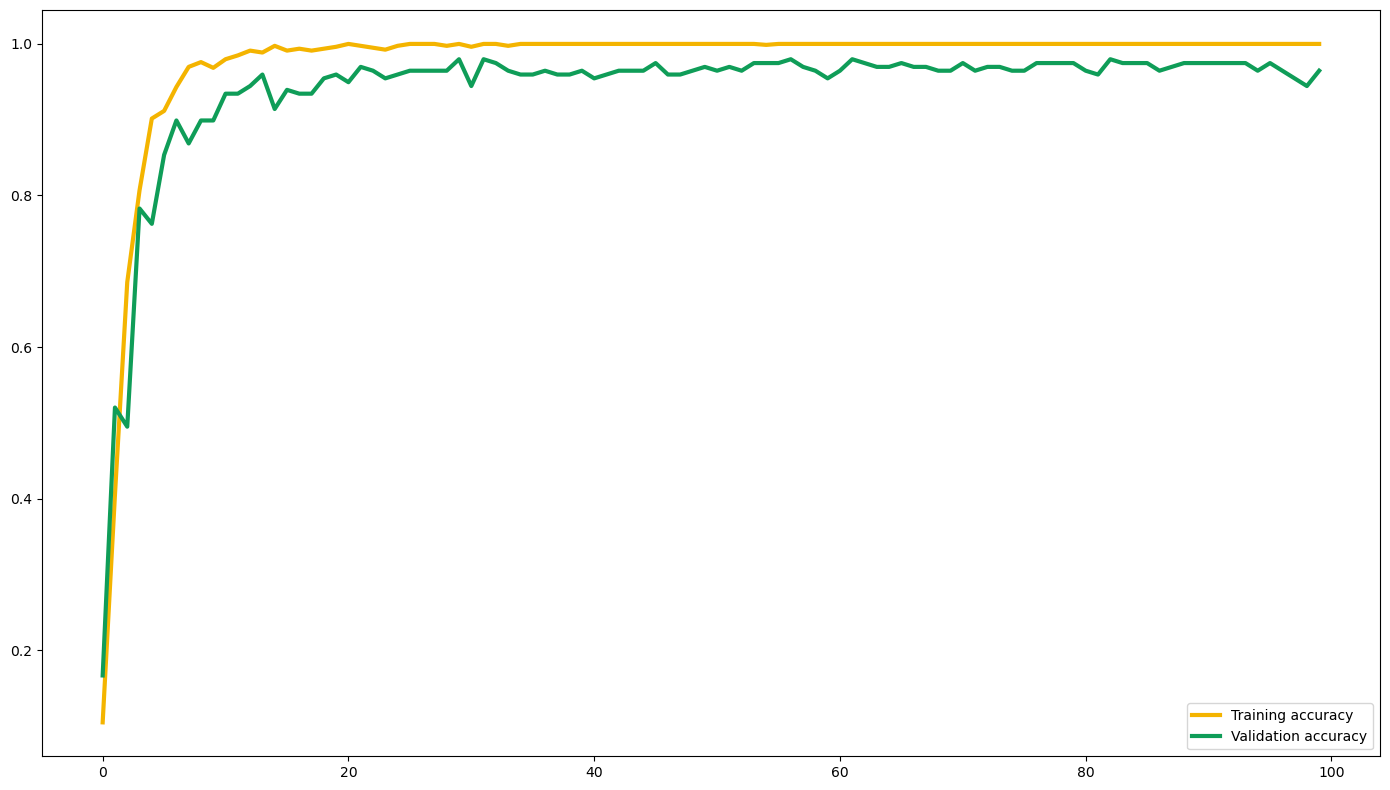

In [78]:
acc_(model_8,history_8)

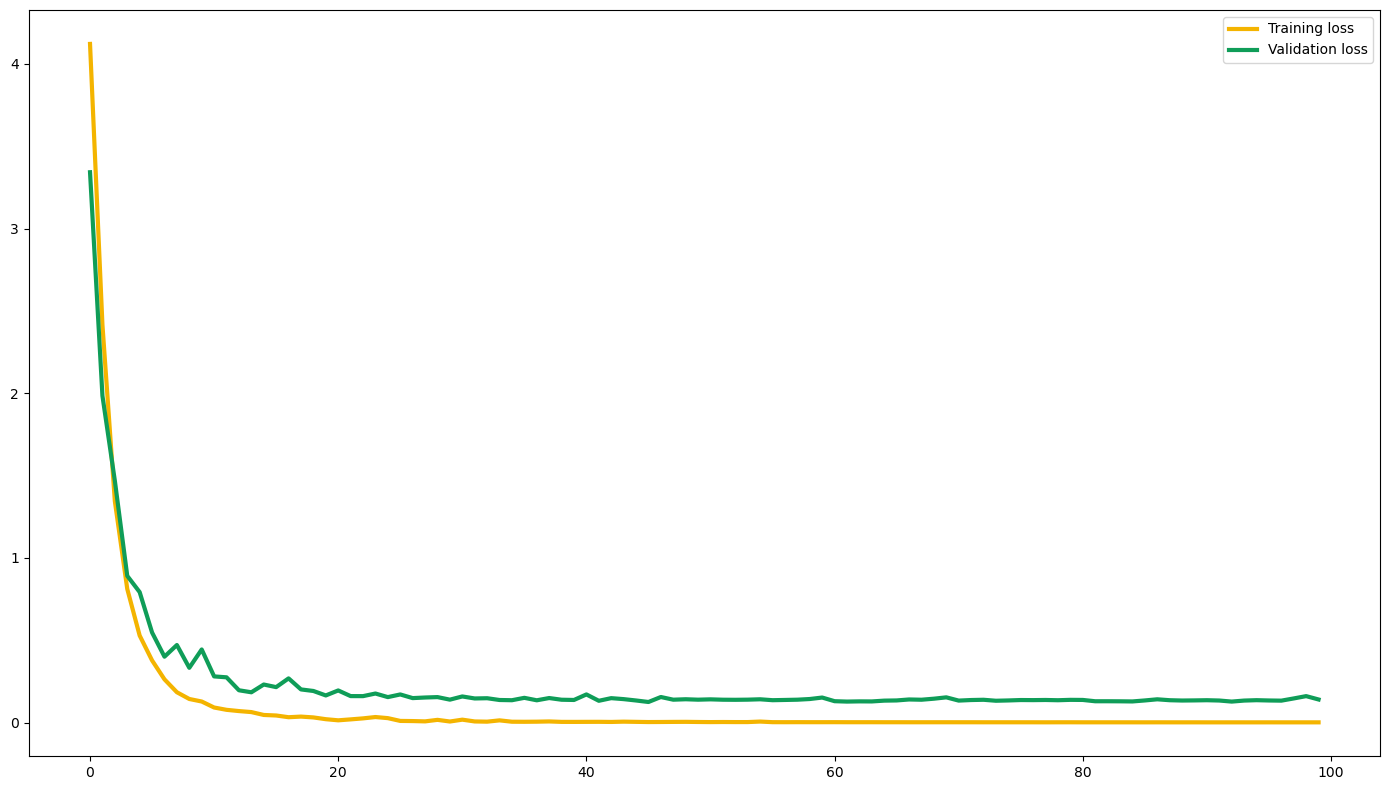

In [79]:
loss_(model_8,history_8)

# trial_4 RMSProp optimizer
# Our second model with RMSProp optimizer with 32 batch size 256 hidden nodes and 0.6 drop out ratio.

In [80]:
rms_prop = tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False, name="RMSprop")

model_9,history_9 = fun_model(rms_prop , 32 , 256 , 0.6)

model_9.summary()

model_9.evaluate(X_val, y_val)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 4.4125 - accuracy: 0.0657 - val_loss: 4.0748 - val_accuracy: 0.1212
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 3.5269 - accuracy: 0.2487 - val_loss: 3.1628 - val_accuracy: 0.3535
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 2.6963 - accuracy: 0.4179 - val_loss: 2.4780 - val_accuracy: 0.5455
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 2.0496 - accuracy: 0.5707 - val_loss: 1.9499 - val_accuracy: 0.6162
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 1.5857 - accuracy: 0.6667 - val_loss: 1.5489 - val_accuracy: 0.6768
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2900 - accuracy: 0.7386 - val_loss: 1.2292 - val_accuracy: 0.7424
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1.0101 - accuracy: 0.8068 - val_loss: 0.9797 - val_accuracy: 0.8283
Epoch 8/100
2

[0.12182703614234924, 0.9797979593276978]

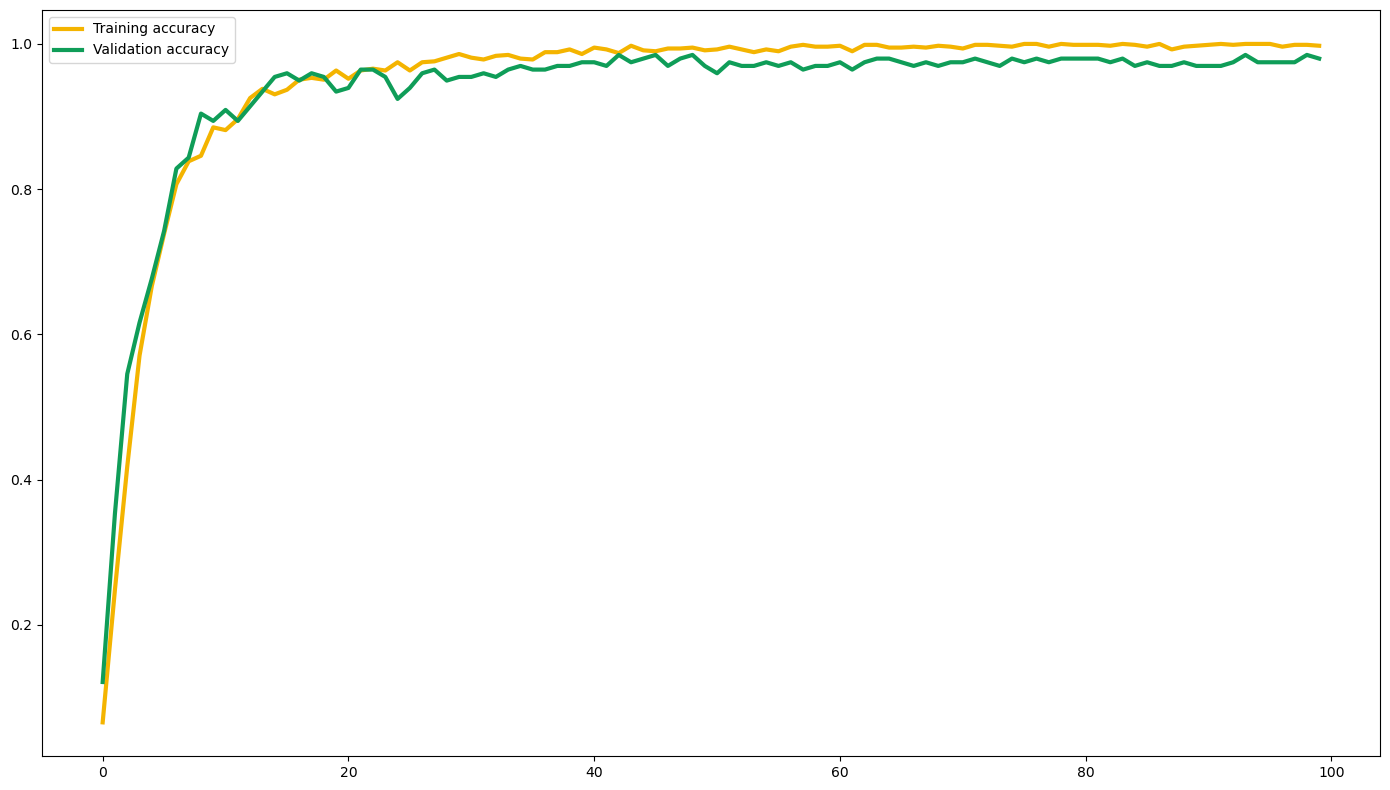

In [81]:
acc_(model_9,history_9)

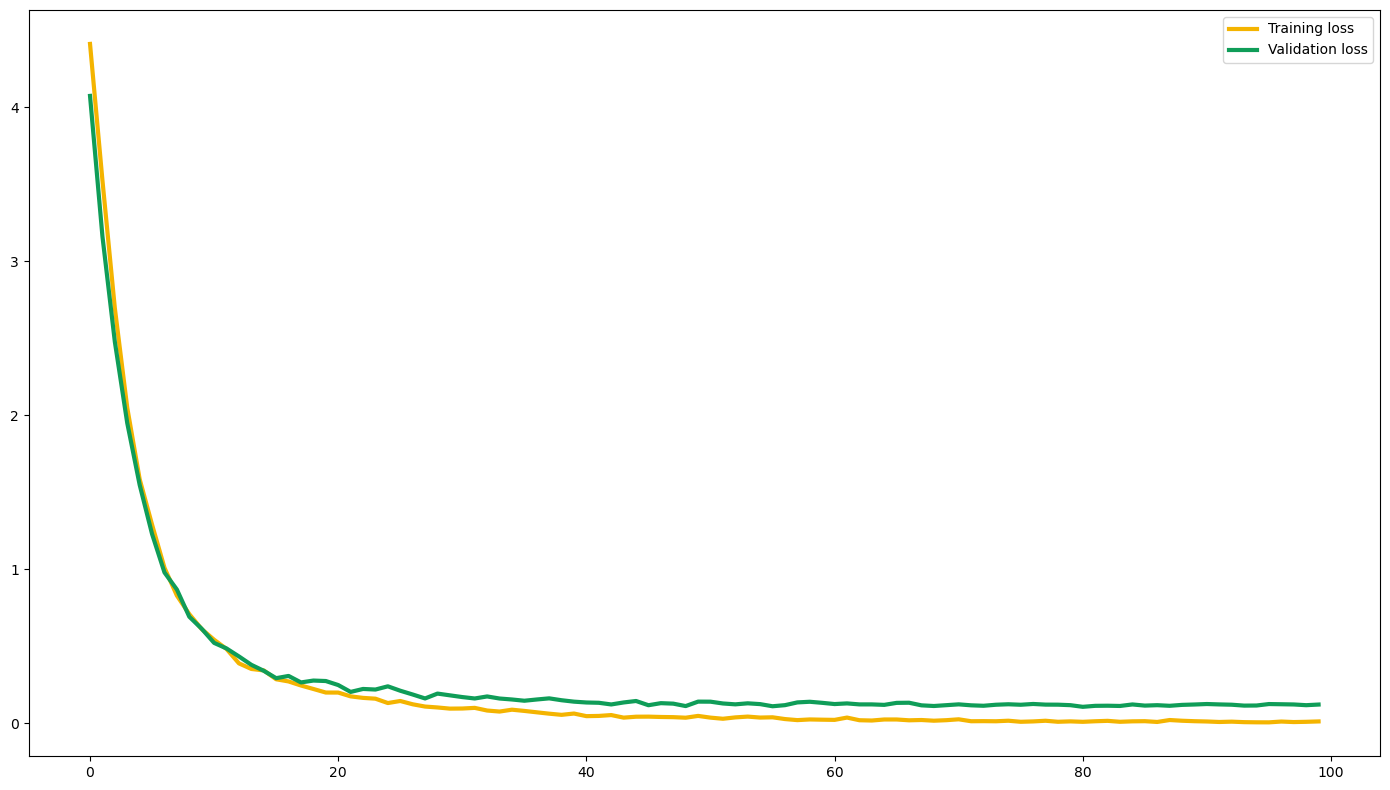

In [82]:
loss_(model_9,history_9)

# trial_5 RMSProp optimizer
# Our second model with RMSProp optimizer with 32 batch size 128 hidden nodes and 0.4 drop out ratio.

In [83]:
rms_prop = tf.keras.optimizers.RMSprop(learning_rate=0.01,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False, name="RMSprop")

model_10,history_10 = fun_model(rms_prop , 32 , 128 , 0.4)

model_10.summary()

model_10.evaluate(X_val, y_val)

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 4.4426 - accuracy: 0.0846 - val_loss: 4.1187 - val_accuracy: 0.1919
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 3.6528 - accuracy: 0.2740 - val_loss: 3.2799 - val_accuracy: 0.3535
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2.7552 - accuracy: 0.4457 - val_loss: 2.5603 - val_accuracy: 0.5202
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 2.0906 - accuracy: 0.6187 - val_loss: 2.0344 - val_accuracy: 0.5960
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1.6271 - accuracy: 0.6705 - val_loss: 1.6145 - val_accuracy: 0.7273
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2621 - accuracy: 0.7689 - val_loss: 1.2725 - val_accuracy: 0.7576
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.0110 - accuracy: 0.8308 - val_loss: 1.0191 - val_accuracy: 0.7980
Epoch 8/100
2

[0.1295897215604782, 0.9747474789619446]

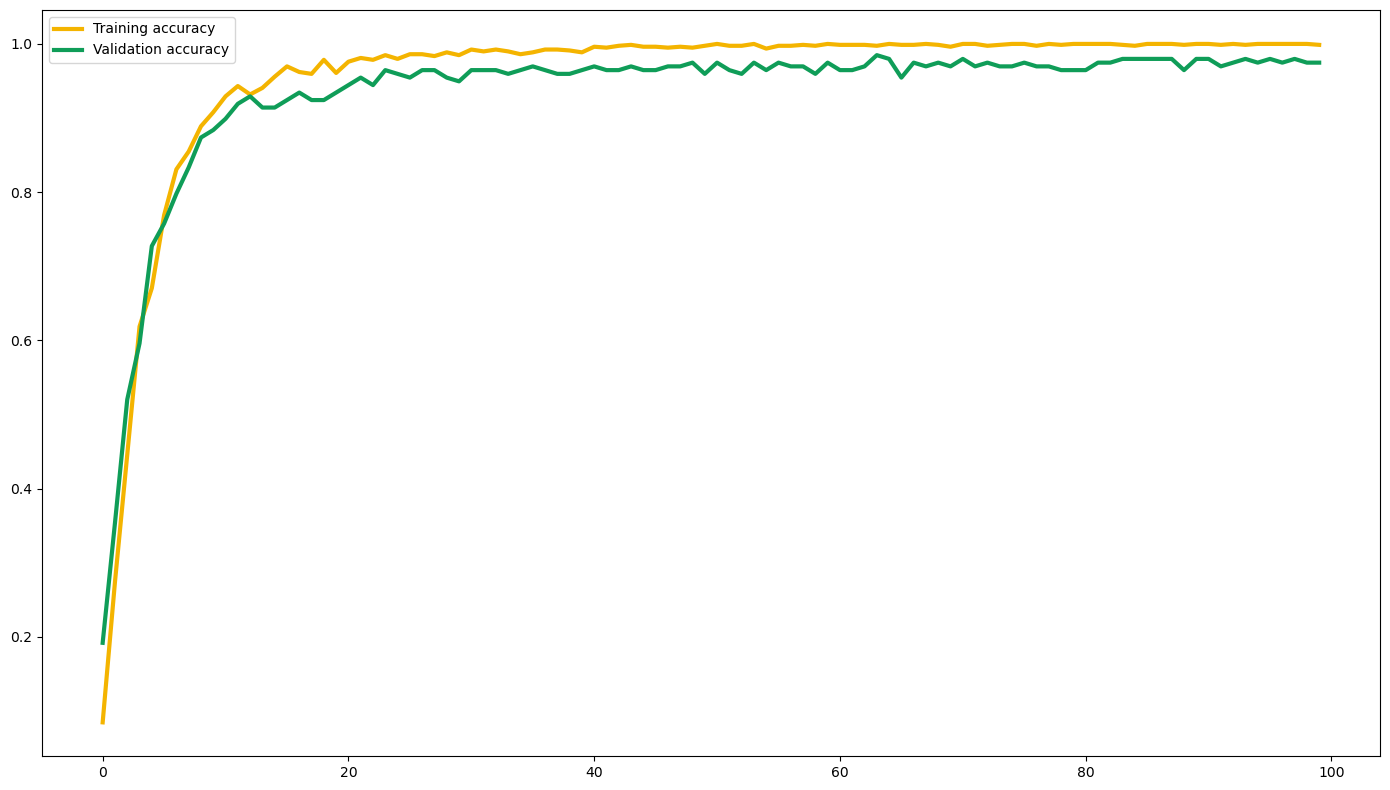

In [84]:
acc_(model_10,history_10)

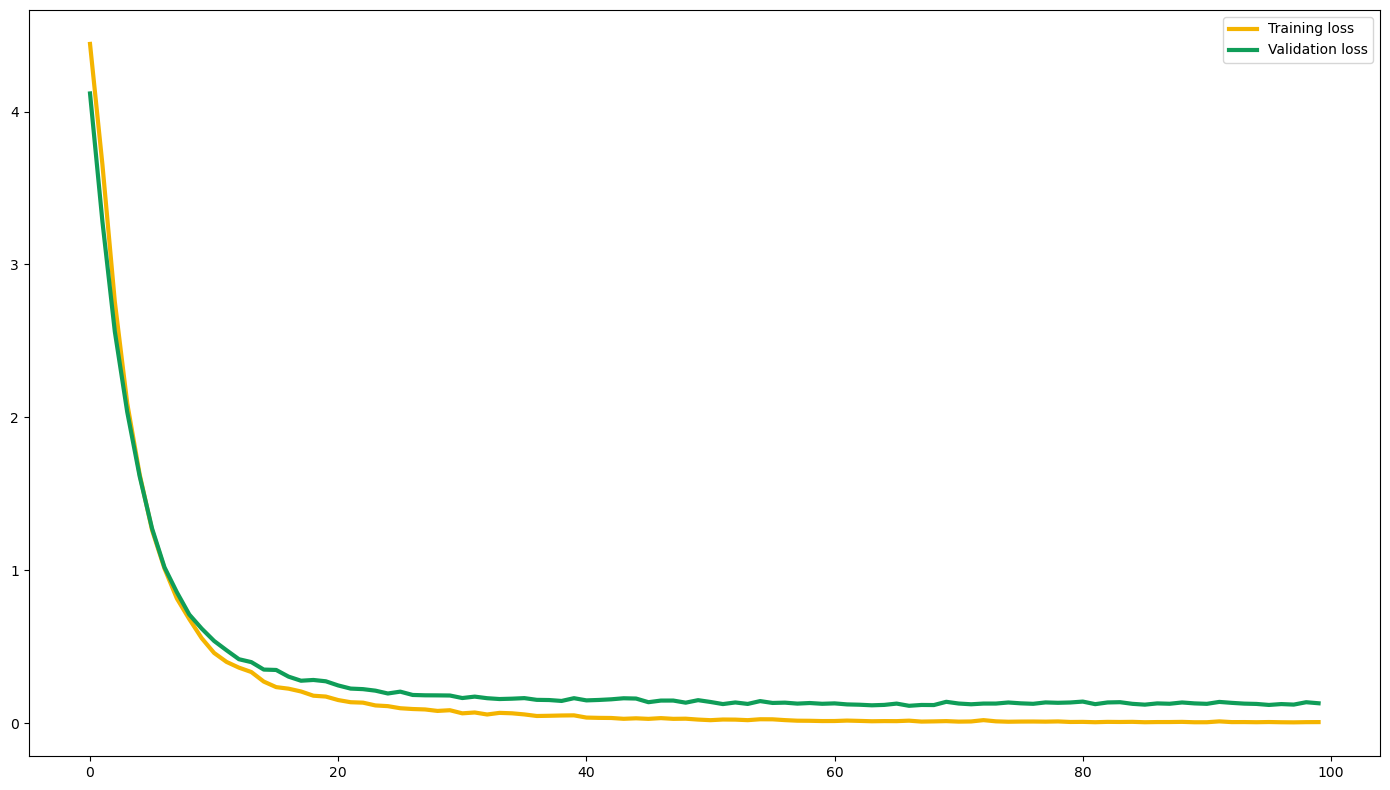

In [85]:
loss_(model_10,history_10)

# trial_1 SGD optimizer
# Our second model with SGD optimizer with 32 batch size and 0.5 drop out ratio.

In [86]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.9, momentum=0.0, nesterov=False, name="SGD")

model_11,history_11 = fun_model(sgd ,32, 512 , 0.5 )

model_11.summary()
model_11.evaluate(X_val, y_val)

Epoch 1/100
25/25 [==============================] - 1s 28ms/step - loss: 4.6109 - accuracy: 0.0114 - val_loss: 4.6048 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 4.5724 - accuracy: 0.0164 - val_loss: 4.5821 - val_accuracy: 0.0152
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 4.5193 - accuracy: 0.0328 - val_loss: 4.5562 - val_accuracy: 0.0152
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 4.4485 - accuracy: 0.0631 - val_loss: 4.5094 - val_accuracy: 0.0556
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 4.3809 - accuracy: 0.0884 - val_loss: 4.4283 - val_accuracy: 0.0354
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 4.2747 - accuracy: 0.1035 - val_loss: 4.3433 - val_accuracy: 0.0606
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 4.1448 - accuracy: 0.1263 - val_loss: 4.2277 - val_accuracy: 0.0960
Epoch 8/

[0.37590739130973816, 0.9141414165496826]

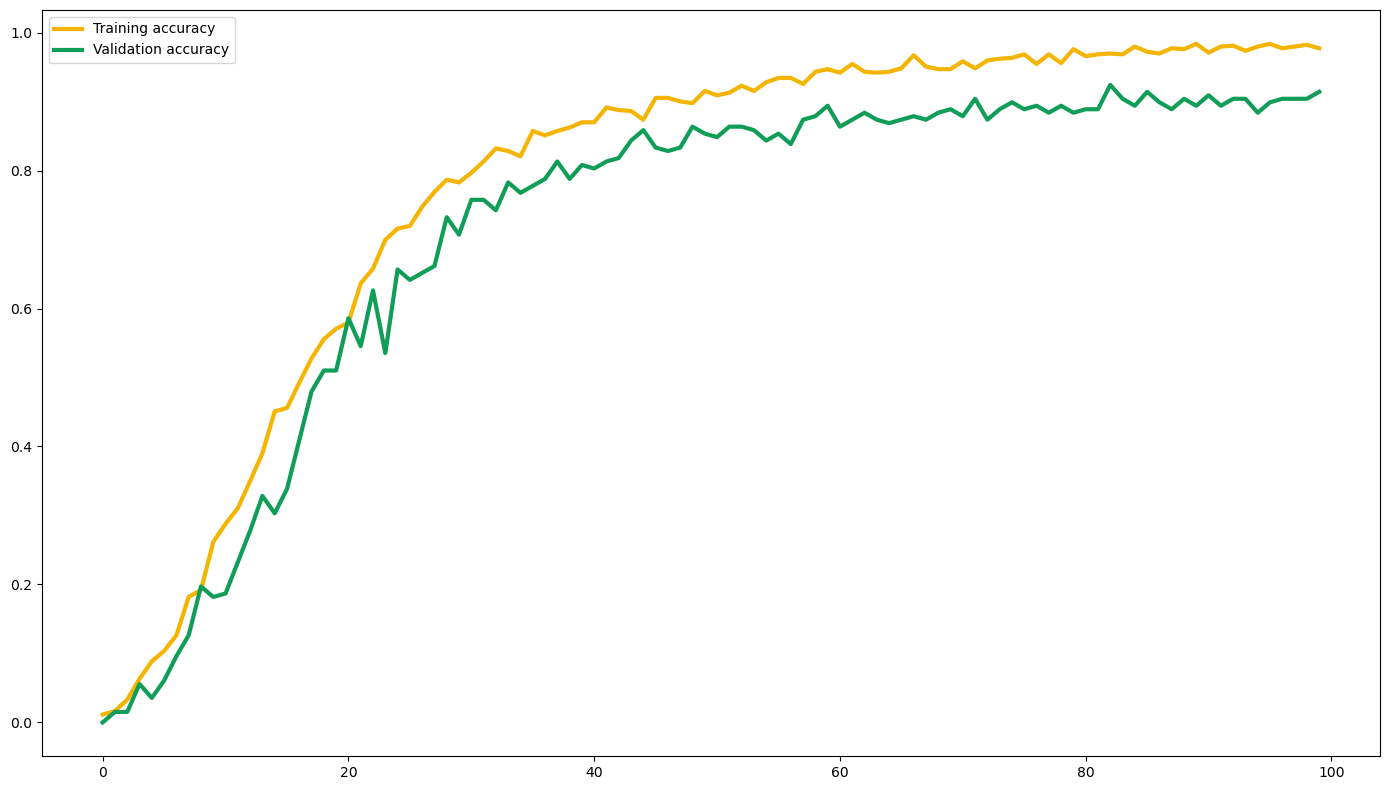

In [87]:
acc_(model_11,history_11)

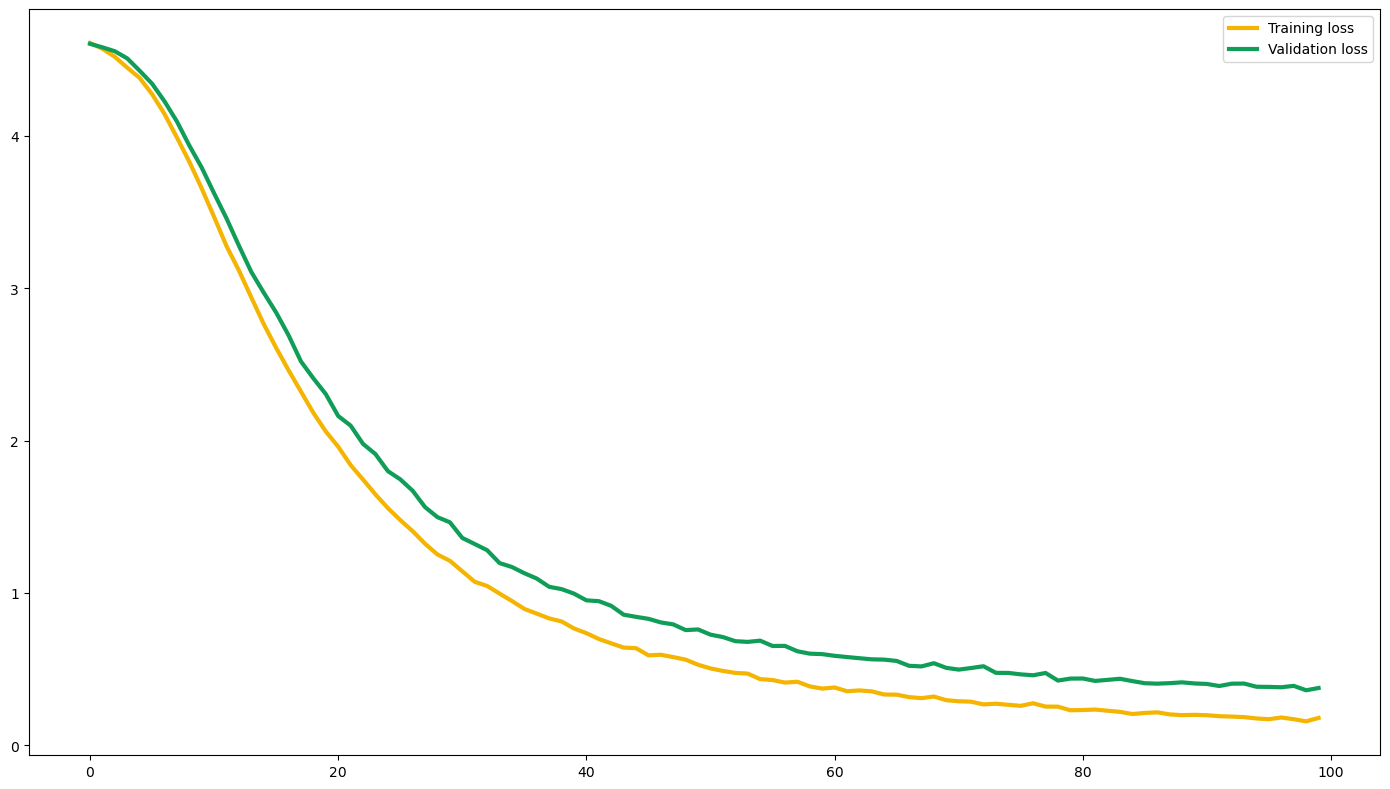

In [88]:
loss_(model_11,history_11)

# trial_2 SGD optimizer
# Our second model with SGD optimizer with 16 batch size and 0.3 drop out ratio.

In [89]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.9, momentum=0.0, nesterov=False, name="SGD")

model_12,history_12 = fun_model(sgd ,16, 512 , 0.3 )

model_12.summary()
model_12.evaluate(X_val, y_val)

Epoch 1/100
50/50 [==============================] - 1s 7ms/step - loss: 4.6175 - accuracy: 0.0101 - val_loss: 4.5940 - val_accuracy: 0.0101
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 4.5132 - accuracy: 0.0366 - val_loss: 4.5132 - val_accuracy: 0.0000e+00
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 4.3633 - accuracy: 0.0694 - val_loss: 4.3644 - val_accuracy: 0.0354
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 4.1223 - accuracy: 0.1162 - val_loss: 4.1471 - val_accuracy: 0.0505
Epoch 5/100
50/50 [==============================] - 0s 4ms/step - loss: 3.7996 - accuracy: 0.1667 - val_loss: 3.8124 - val_accuracy: 0.1212
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 3.4378 - accuracy: 0.2298 - val_loss: 3.5521 - val_accuracy: 0.1364
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 3.1135 - accuracy: 0.2904 - val_loss: 3.1625 - val_accuracy: 0.2828
Epoch 8/1

[0.2255830615758896, 0.9444444179534912]

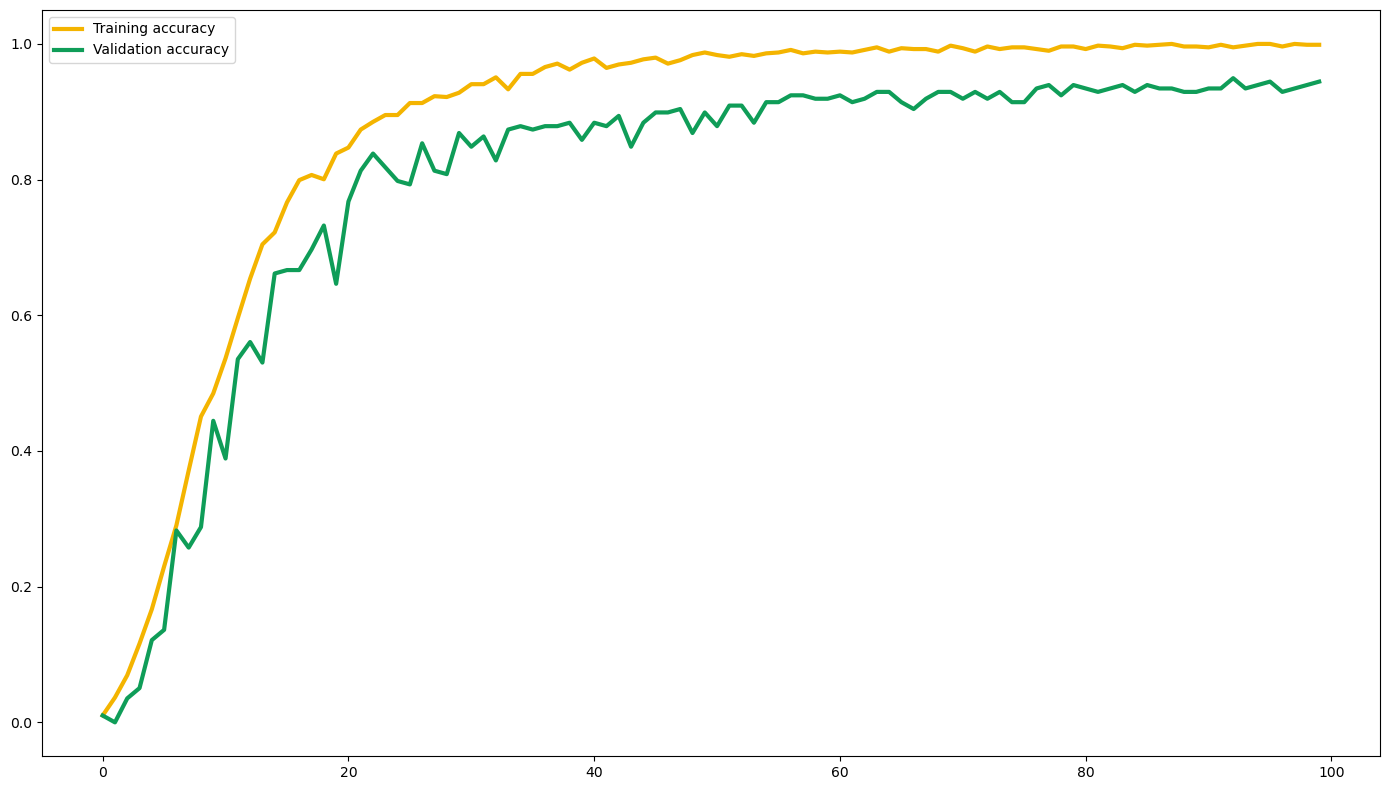

In [90]:
acc_(model_12,history_12)

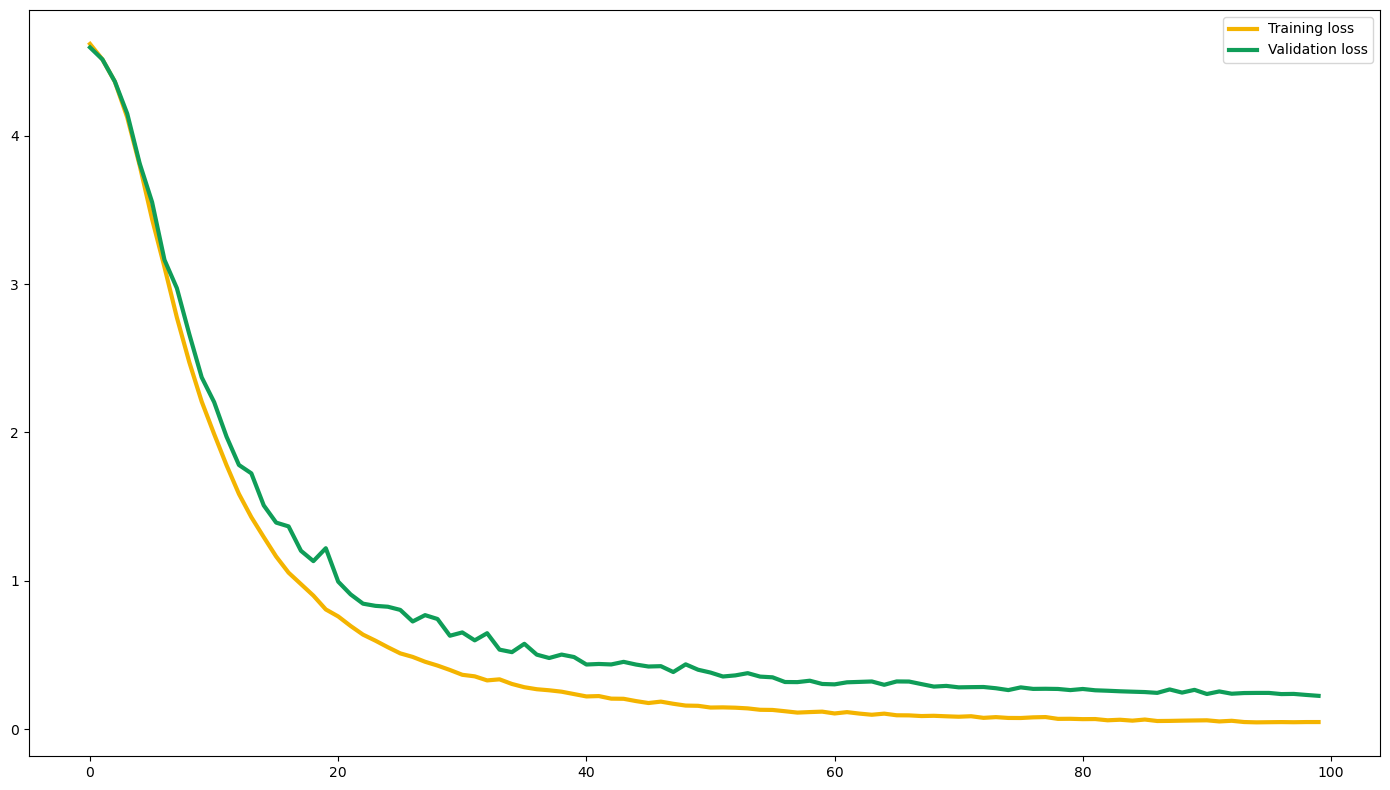

In [91]:
loss_(model_12,history_12)

# trial_3 SGD optimizer
# Our second model with SGD optimizer with 64 batch size 1024 hidden nodes and 0.2 drop out ratio.

In [92]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.9, momentum=0.0, nesterov=False, name="SGD")

model_13,history_13 = fun_model(sgd ,64, 1024 , 0.2 )

model_13.summary()
model_13.evaluate(X_val, y_val)

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 4.6044 - accuracy: 0.0177 - val_loss: 4.6044 - val_accuracy: 0.0051
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 4.5760 - accuracy: 0.0303 - val_loss: 4.6063 - val_accuracy: 0.0051
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 4.5467 - accuracy: 0.0480 - val_loss: 4.5979 - val_accuracy: 0.0101
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 4.5176 - accuracy: 0.0619 - val_loss: 4.5870 - val_accuracy: 0.0202
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 4.4882 - accuracy: 0.0833 - val_loss: 4.5704 - val_accuracy: 0.0152
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 4.4509 - accuracy: 0.1061 - val_loss: 4.5442 - val_accuracy: 0.0404
Epoch 7/100
13/13 [==============================] - 0s 10ms/step - loss: 4.4118 - accuracy: 0.1275 - val_loss: 4.5200 - val_accuracy: 0.0505
Epoch 8/10

[0.6690077185630798, 0.868686854839325]

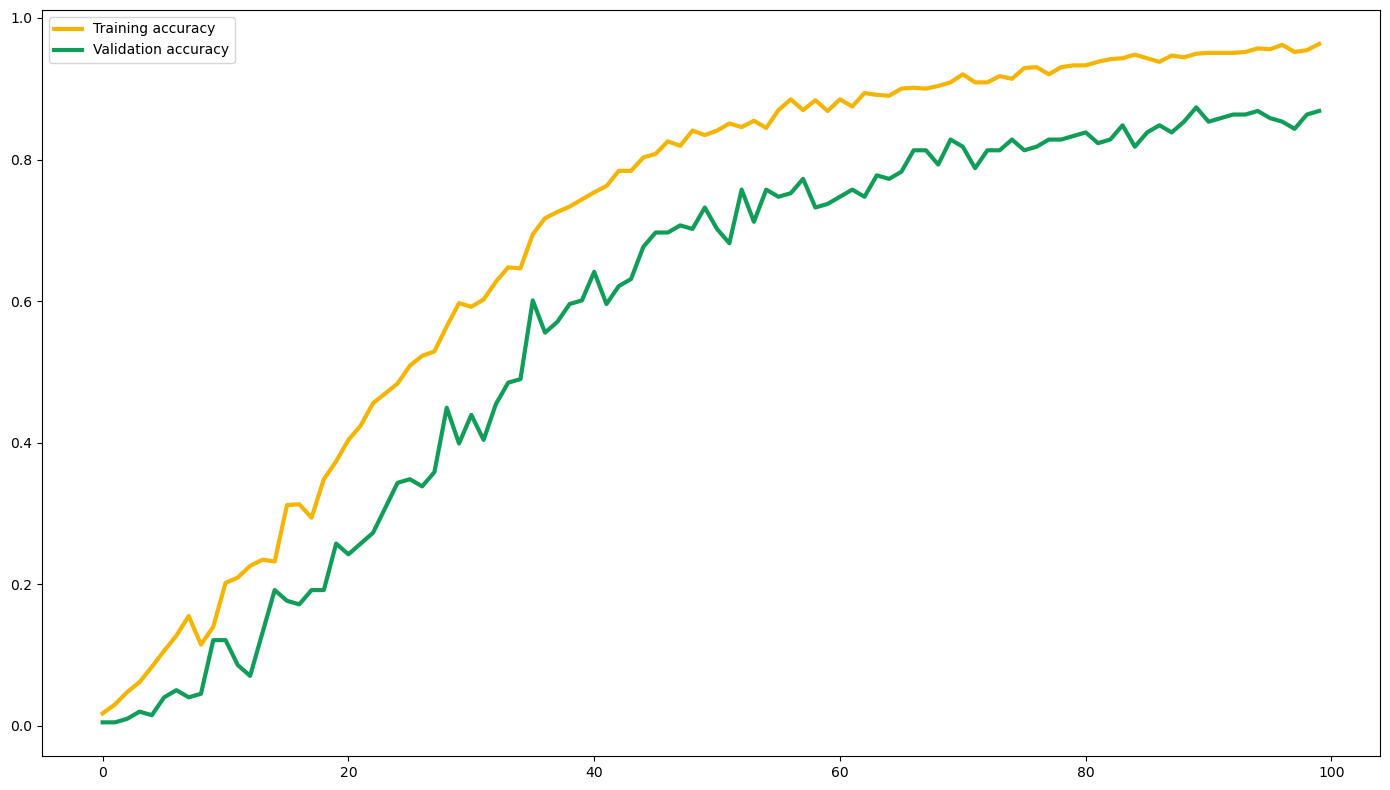

In [93]:
acc_(model_13,history_13)

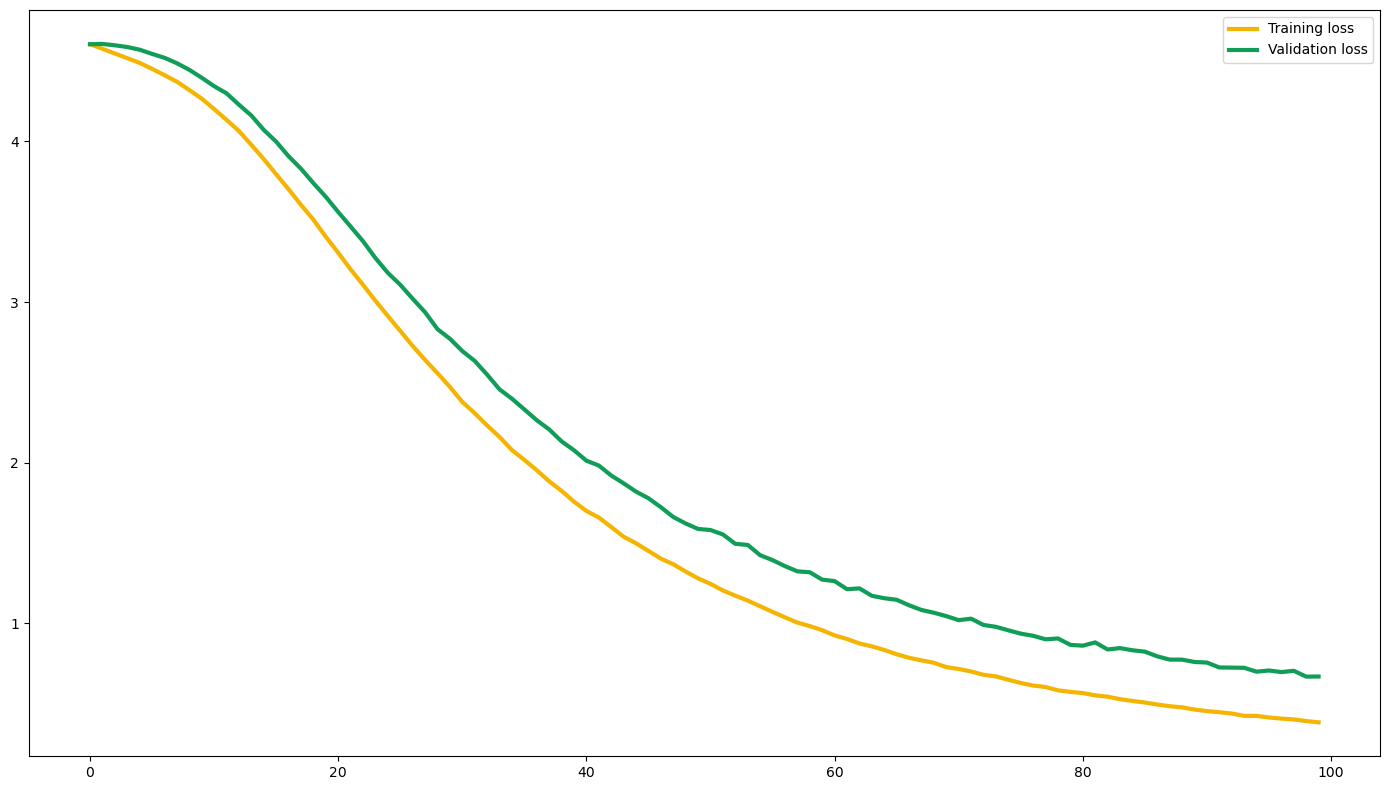

In [94]:
loss_(model_13,history_13)

# trial_4 SGD optimizer
# Our second model with SGD optimizer with 32 batch size 256 hidden nodes and 0.6 drop out ratio.

In [95]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.9, momentum=0.0, nesterov=False, name="SGD")

model_14,history_14 = fun_model(sgd ,32, 256 , 0.6 )

model_14.summary()
model_14.evaluate(X_val, y_val)

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 4.6114 - accuracy: 0.0076 - val_loss: 4.6118 - val_accuracy: 0.0051
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 4.5837 - accuracy: 0.0227 - val_loss: 4.5910 - val_accuracy: 0.0202
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 4.5431 - accuracy: 0.0316 - val_loss: 4.5748 - val_accuracy: 0.0404
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 4.4945 - accuracy: 0.0505 - val_loss: 4.5544 - val_accuracy: 0.0354
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 4.4372 - accuracy: 0.0631 - val_loss: 4.4809 - val_accuracy: 0.0505
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 4.3531 - accuracy: 0.0859 - val_loss: 4.4019 - val_accuracy: 0.0909
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 4.2491 - accuracy: 0.1149 - val_loss: 4.3146 - val_accuracy: 0.0909
Epoch 8/100


[0.3789485692977905, 0.9141414165496826]

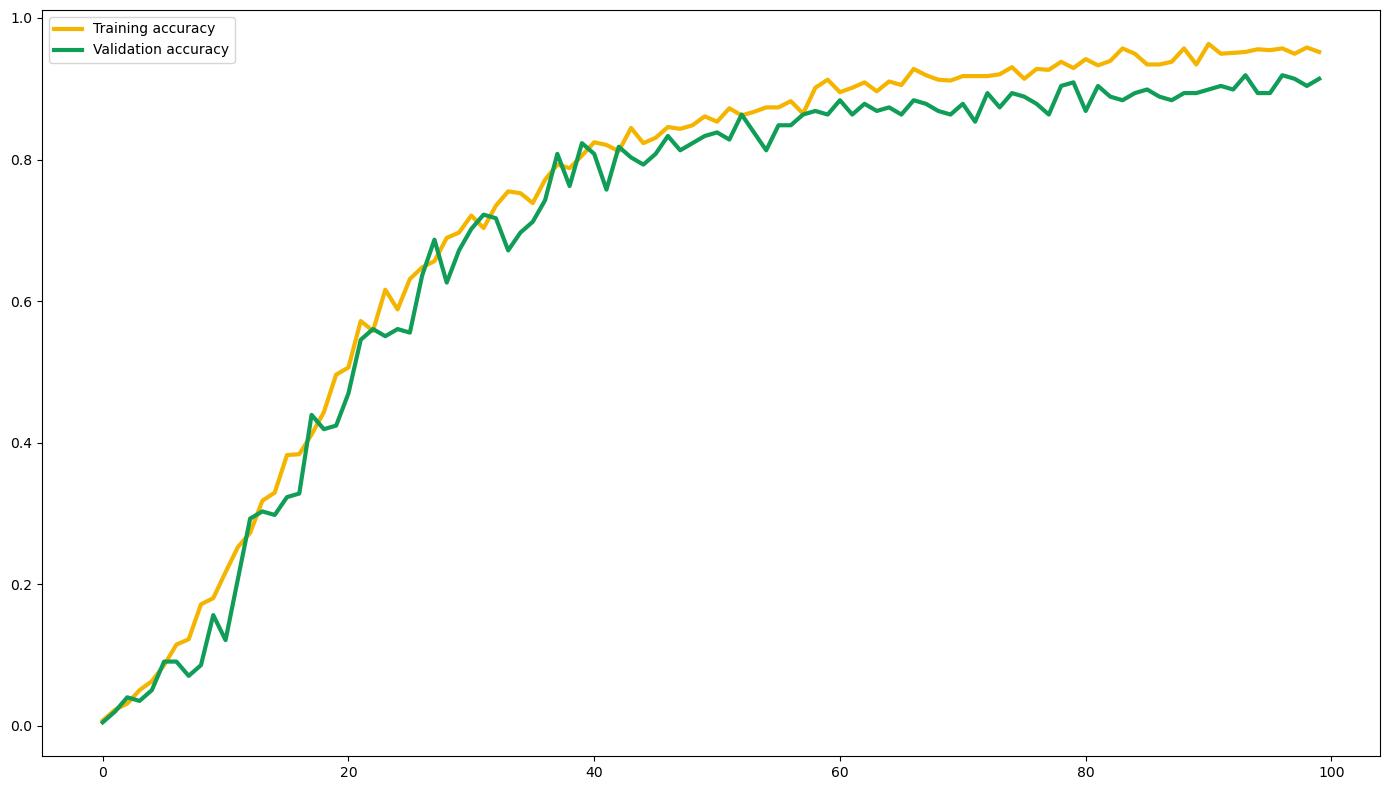

In [96]:
acc_(model_14,history_14)

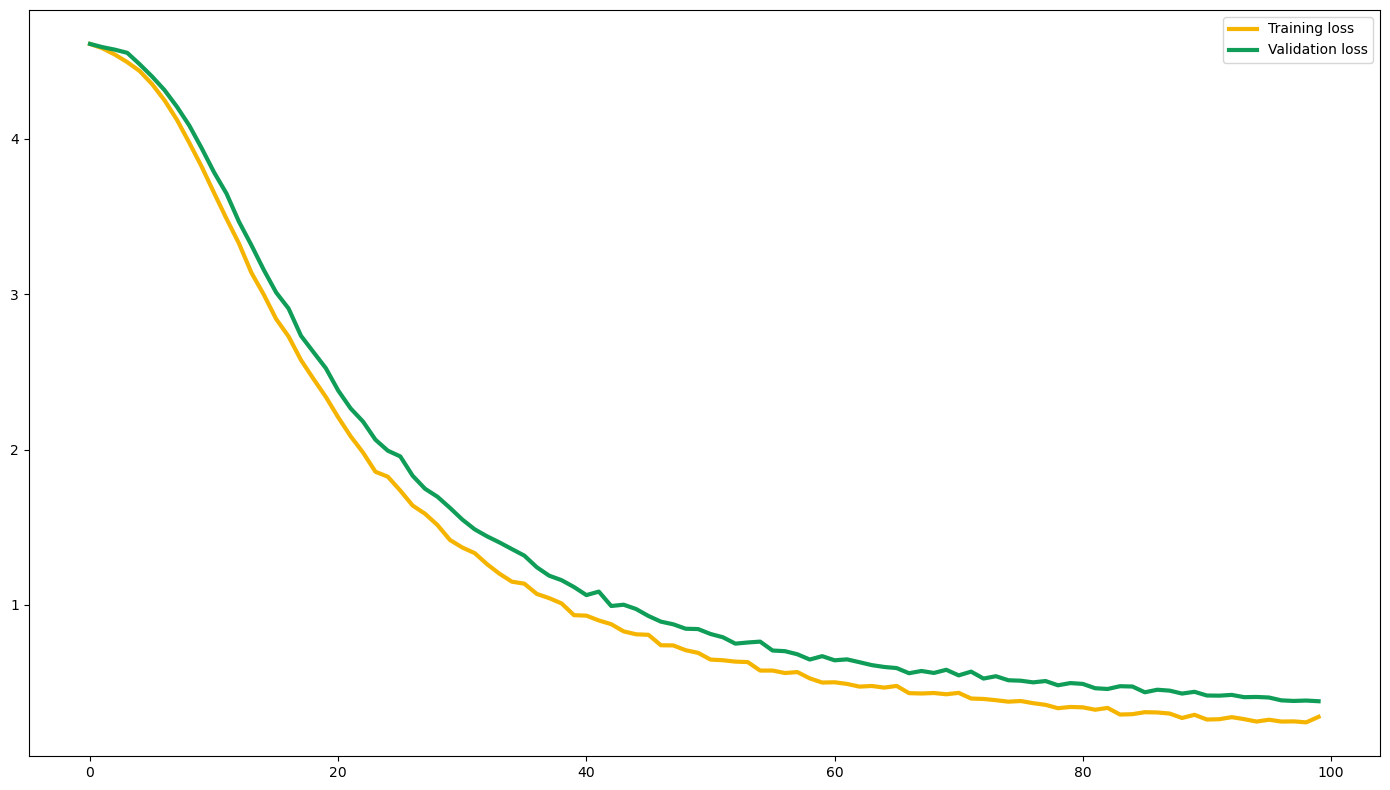

In [97]:
loss_(model_14,history_14)

# trial_5 SGD optimizer
# Our second model with SGD optimizer with 32 batch size 128 hidden nodes and 0.4 drop out ratio.

In [98]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.9, momentum=0.0, nesterov=False, name="SGD")

model_15,history_15 = fun_model(sgd ,32, 128 , 0.4 )

model_15.summary()
model_15.evaluate(X_val, y_val)

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 4.6092 - accuracy: 0.0088 - val_loss: 4.6115 - val_accuracy: 0.0051
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 4.5808 - accuracy: 0.0253 - val_loss: 4.6062 - val_accuracy: 0.0152
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 4.5534 - accuracy: 0.0391 - val_loss: 4.5870 - val_accuracy: 0.0404
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 4.5078 - accuracy: 0.0492 - val_loss: 4.5705 - val_accuracy: 0.0202
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 4.4640 - accuracy: 0.0619 - val_loss: 4.5247 - val_accuracy: 0.0707
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 4.3951 - accuracy: 0.0846 - val_loss: 4.4675 - val_accuracy: 0.0505
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 4.3048 - accuracy: 0.0972 - val_loss: 4.4094 - val_accuracy: 0.0606
Epoch 8/100
2

[0.40374112129211426, 0.9040403962135315]

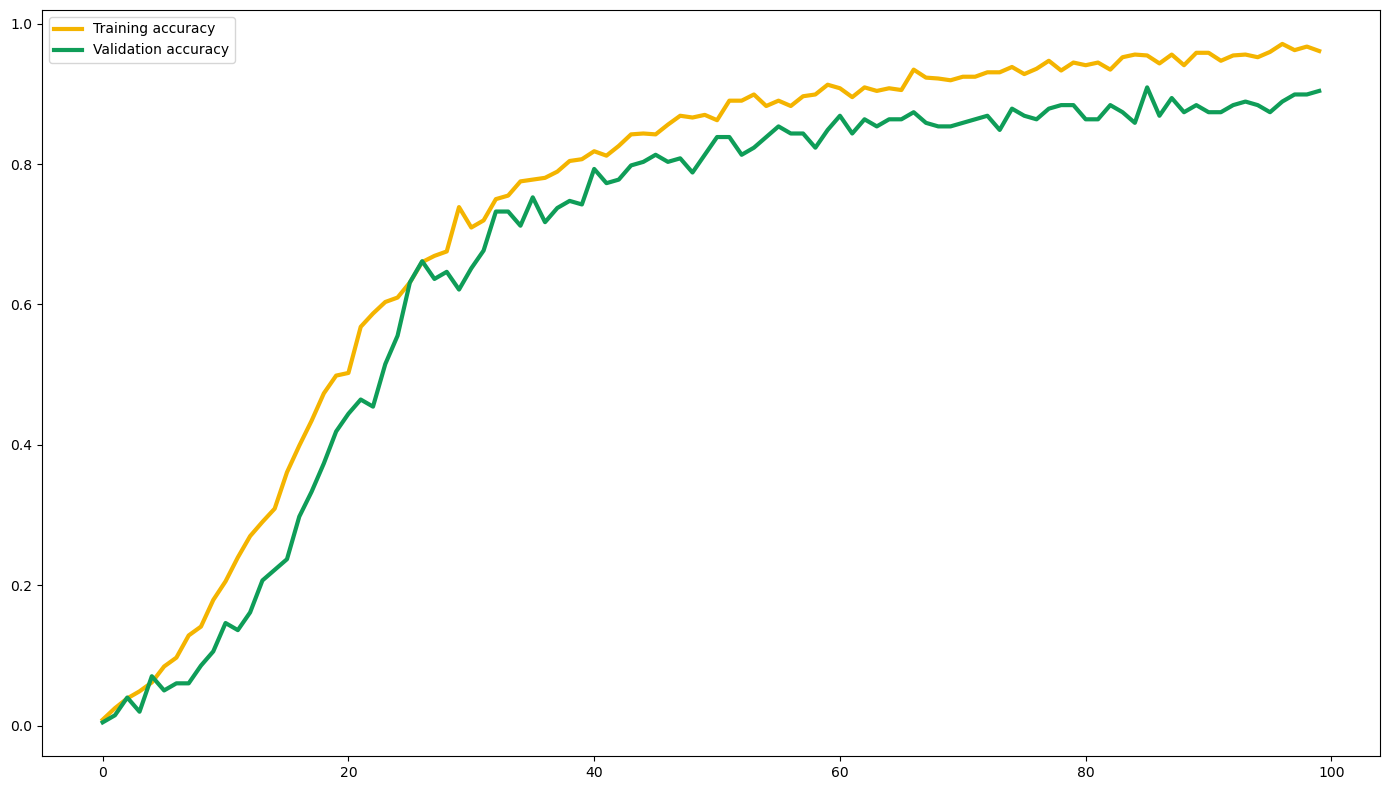

In [99]:
acc_(model_15,history_15)

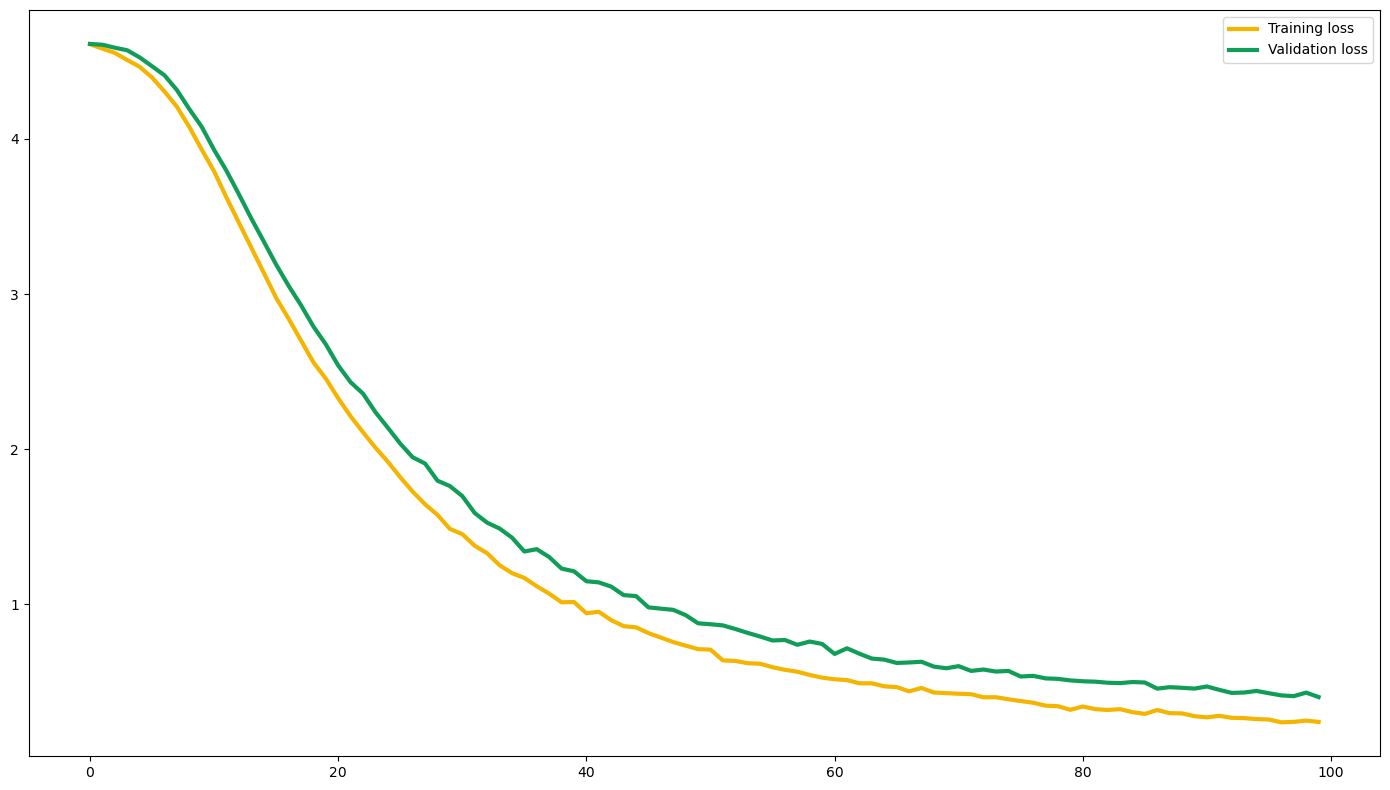

In [100]:
loss_(model_15,history_15)